**Data Source:** https://www.kaggle.com/datasets/START-UMD/gtd

#**Introduction**

Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

**Definition of terrorism:**

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

**About dataset:**

Size: (181691, 135)

Geography: Worldwide

Time period: 1970-2017, except 1993

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes.



**☆ HIGHLIGHTS**:

1. Overview of the whole world
2. Know terrorist trends and regional differences
3. Be able to answer the big question posed in the end

**☆ CHALLENGE**:

1. Understand the meaning of the columns.
2. Find the right chart to show the change of trends across each region.
3. Thinking about big question for analysis
4. Find an approach to analyze and answer the big question.
5. Some difficulties in coding, drawing maps.

#**Import Libraries And Set Up**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%time
# Install Geopandas
!pip install geopandas
# Install Folium for Geographic data visualization
!pip install folium


CPU times: user 109 ms, sys: 24 ms, total: 133 ms
Wall time: 15.2 s


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


import geopandas as gpd
import folium

In [4]:
print(gpd.__version__)

0.13.2


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Python/Project/Globle_Terror/global_terror.csv' , encoding = "latin1",low_memory=False)

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.shape

(181691, 135)

In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
pd.set_option('display.max_rows', None)

#**Overall Observation Data**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


--> Find out Those columns that have grater than 50% missing value We will Remove that columns

In [11]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [12]:
from tabulate import tabulate

# Assuming you have already computed the variable n
n = (df.isnull().sum() / len(df)) * 100

# Filter columns with null values greater than 50
filtered_data = {key: value for key, value in n.items() if value >= 50}

# Convert the filtered data to a list of lists for tabulate
table = [(column_name, percentage) for column_name, percentage in filtered_data.items()]

# Display the table
print(tabulate(table, headers=["Column", "Null Percentage"], tablefmt="grid"))

# Count the number of columns
num_columns = len(filtered_data)
print(f"Number of columns with null values greater than 50: {num_columns}")


+--------------------+-------------------+
| Column             |   Null Percentage |
+====================+===================+
| approxdate         |           94.915  |
+--------------------+-------------------+
| resolution         |           98.7781 |
+--------------------+-------------------+
| location           |           69.4564 |
+--------------------+-------------------+
| alternative        |           84.0328 |
+--------------------+-------------------+
| alternative_txt    |           84.0328 |
+--------------------+-------------------+
| attacktype2        |           96.5249 |
+--------------------+-------------------+
| attacktype2_txt    |           96.5249 |
+--------------------+-------------------+
| attacktype3        |           99.7644 |
+--------------------+-------------------+
| attacktype3_txt    |           99.7644 |
+--------------------+-------------------+
| targtype2          |           93.8665 |
+--------------------+-------------------+
| targtype2

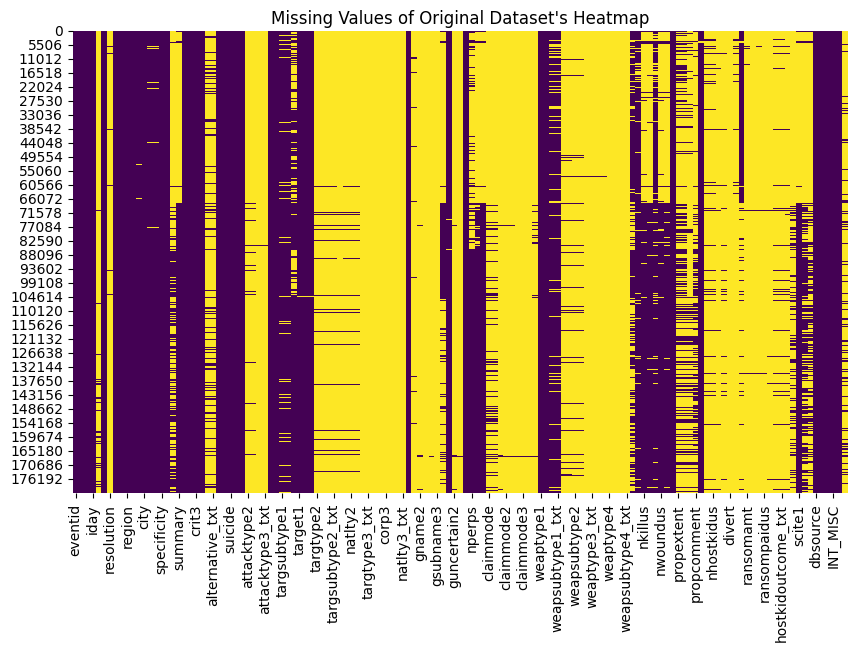

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

plt.title('Missing Values of Original Dataset\'s Heatmap')
plt.show()

**Get the columns needed for the analysis :**

In [14]:
df_new = df[['iyear', 'imonth', 'iday', 'country_txt', 'latitude', 'longitude', 'region_txt', 'city', 'targtype1_txt', 'targsubtype1_txt',
             'gname', 'attacktype1_txt', 'weaptype1_txt', 'nkill']].copy()

In [15]:
# df_new.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','latitude':'latitude', 'longitude':'longitude','region_txt':'Region','city' : 'city','attacktype1_txt':'AttackType','targtype1_txt':'Target_type','targsubtype1_txt':'target_subtype','nkill':'Killed','gname':'Group','weaptype1_txt':'weapon_types'},inplace=True)

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   latitude          177135 non-null  float64
 5   longitude         177134 non-null  float64
 6   region_txt        181691 non-null  object 
 7   city              181257 non-null  object 
 8   targtype1_txt     181691 non-null  object 
 9   targsubtype1_txt  171318 non-null  object 
 10  gname             181691 non-null  object 
 11  attacktype1_txt   181691 non-null  object 
 12  weaptype1_txt     181691 non-null  object 
 13  nkill             171378 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 19.4+ MB


In [17]:
df_new

In [18]:
df_new.sample(5)

In [19]:
df_new.dtypes

In [20]:
df_new.shape

In [21]:
df_new.size

In [93]:
df_new.isnull().sum()


iyear                   0
imonth                  0
iday                    0
country_txt             0
latitude             4556
longitude            4557
region_txt              0
city                  434
targtype1_txt           0
targsubtype1_txt    10373
gname                   0
attacktype1_txt         0
weaptype1_txt           0
nkill               10313
dtype: int64

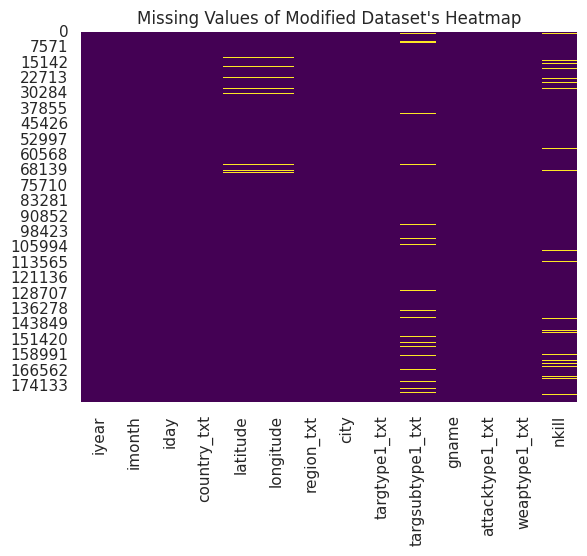

In [94]:
sns.heatmap(df_new.isnull(), cmap='viridis', cbar=False)

plt.title('Missing Values of Modified Dataset\'s Heatmap')
plt.show()

#**Cleaning Data**

In [95]:
# checking duplicates:
df.duplicated().sum()

0

--> No rows duplicated

**Check the Null Values in the new data**

In [96]:
# check percentage of missing values:
(df_new.isnull().sum() / len(df_new)) * 100

iyear               0.000000
imonth              0.000000
iday                0.000000
country_txt         0.000000
latitude            2.507554
longitude           2.508104
region_txt          0.000000
city                0.238867
targtype1_txt       0.000000
targsubtype1_txt    5.709144
gname               0.000000
attacktype1_txt     0.000000
weaptype1_txt       0.000000
nkill               5.676120
dtype: float64

Keep columns that have less than 50% missing value. All columns will be cleaned later when analysed.

In [97]:
# rename countries to merge with world GeoDatFrame
# not at all but try as much as possible
replacements = [
    ['United States', 'United States of America'],
    ['Central African Republic', 'Central African Rep.'],
    ['Democratic Republic of the Congo', 'Dem. Rep. Congo'],
    ['Equatorial Guinea', 'Eq. Guinea'],
    ["People's Republic of the Congo", 'Congo'],
    ['Republic of the Congo', 'Congo'],
    ['Swaziland', 'eSwatini'],
    ['Western Sahara', 'W. Sahara'],
    ['South Vietnam', 'Vietnam'],
    ['East Timor', 'Timor-Leste'],
    ['Solomon Islands', 'Solomon Is.'],
    ['Dominican Republic', 'Dominican Rep.'],
    ['Falkland Islands', 'Falkland Is.'],
    ['S America', 'South America'],
    ['West Germany (FRG)', 'Germany'],
    ['Bosnia-Herzegovina', 'Bosnia and Herz.'],
    ['Czech Republic', 'Czechia'],
    ['East Germany (GDR)', 'Germany'],
    ['Slovak Republic', 'Slovakia'],
    # according to wikipedia the modern states of East Asia include China, Japan, Mongolia, North Korea, South Korea, and Taiwan,
    # Hong Kong and Macau are now special administrative and autonomous region of China, so i change their names to China (just for analysis purpose)
    ['Hong Kong', 'China'],
    ['Macau', 'China']
]

for r in replacements:
    df_new['country_txt'] = df_new['country_txt'].str.replace(r[0], r[1])

<ipython-input-97-57b74e277159>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new['country_txt'] = df_new['country_txt'].str.replace(r[0], r[1])


#**variable description**

eventid: Unique ID for each event or terrorist attack.

iyear: Year the terrorist attack occurred.

imonth: Month the terrorist attack occurred.

iday: Day the terrorist attack occurred.

country_txt: Name of the country where the terrorist attack occurred.

region_txt: Name of the region where the terrorist attack occurred.

city: City where the terrorist attack occurred.

attacktype1_txt: The general method of attack employed.

target1: The specific person, building, installation, etc., that was targeted.

nkill: Number of confirmed fatalities for the incident.

nwound: Number of confirmed non-fatal injuries.

gname: Name of the group that carried out the attack.

# ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [98]:
data = df_new.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','latitude':'latitude', 'longitude':'longitude','region_txt':'Region','city' : 'city','attacktype1_txt':'AttackType','targtype1_txt':'Target_type','targsubtype1_txt':'target_subtype','nkill':'Killed','gname':'Group','weaptype1_txt':'weapon_types'},inplace=False)

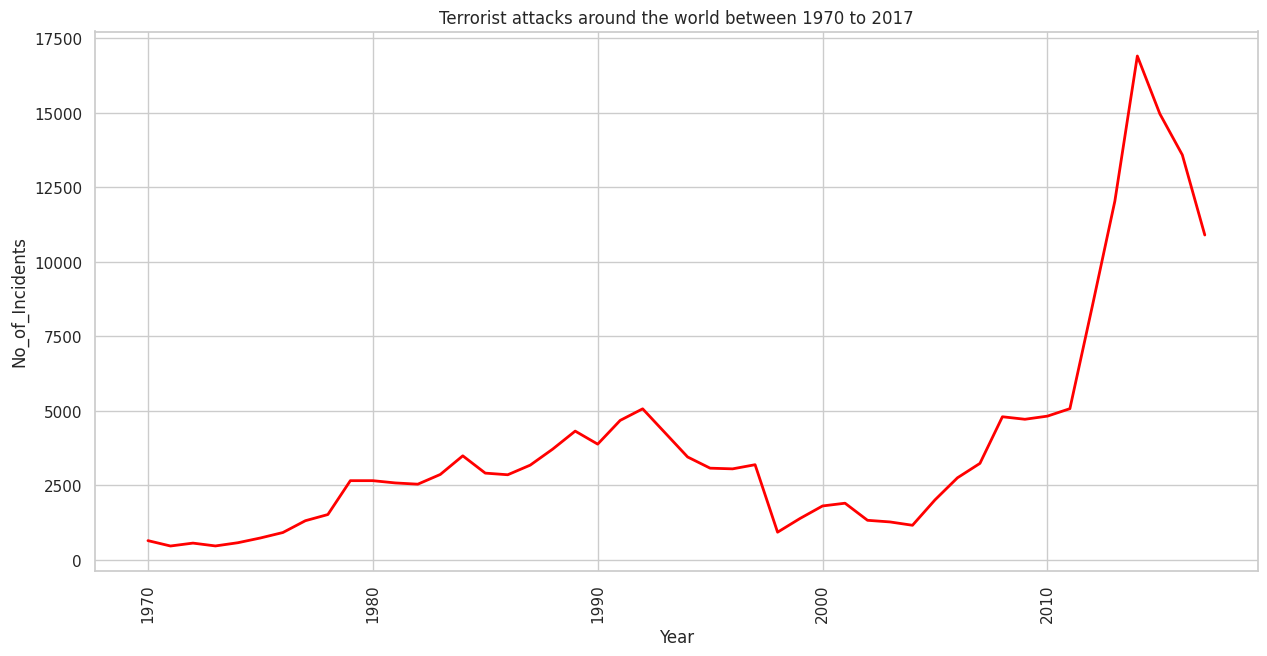

In [99]:
counts_per_year = data['Year'].value_counts().sort_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x=counts_per_year.index, y=counts_per_year.values, lw=2,color='red')
plt.xlabel('Year')
plt.ylabel('No_of_Incidents')
plt.title('Terrorist attacks around the world between 1970 to 2017')
plt.xticks(rotation=90)
plt.show()

**Why** : A line plot was chosen because it provides an excellent visual representation of the trend over time.

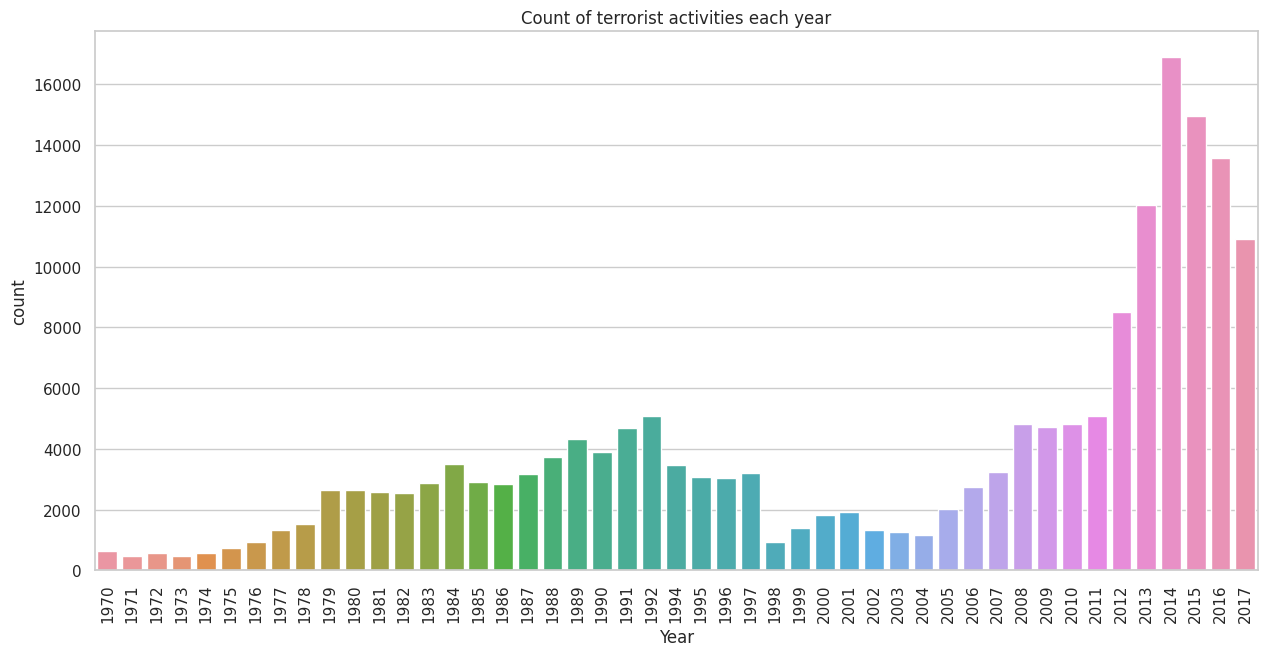

In [100]:
plt.figure(figsize=(15,7))
sns.countplot(data=data, x='Year')
plt.title('Count of terrorist activities each year')
plt.xticks(rotation=90)
plt.show()

**Insight** : The insight that can be gained is the trend of terrorist activities over the years. We can see if the frequency of attacks is increasing, decreasing, or remaining relatively stable.

**Help of this information** : These insights are crucial for predicting future trends, which could help law enforcement and security agencies plan resources and strategies. However, if the trend shows an increase in terrorist activities, this could lead to a negative impact as it indicates a growing problem.

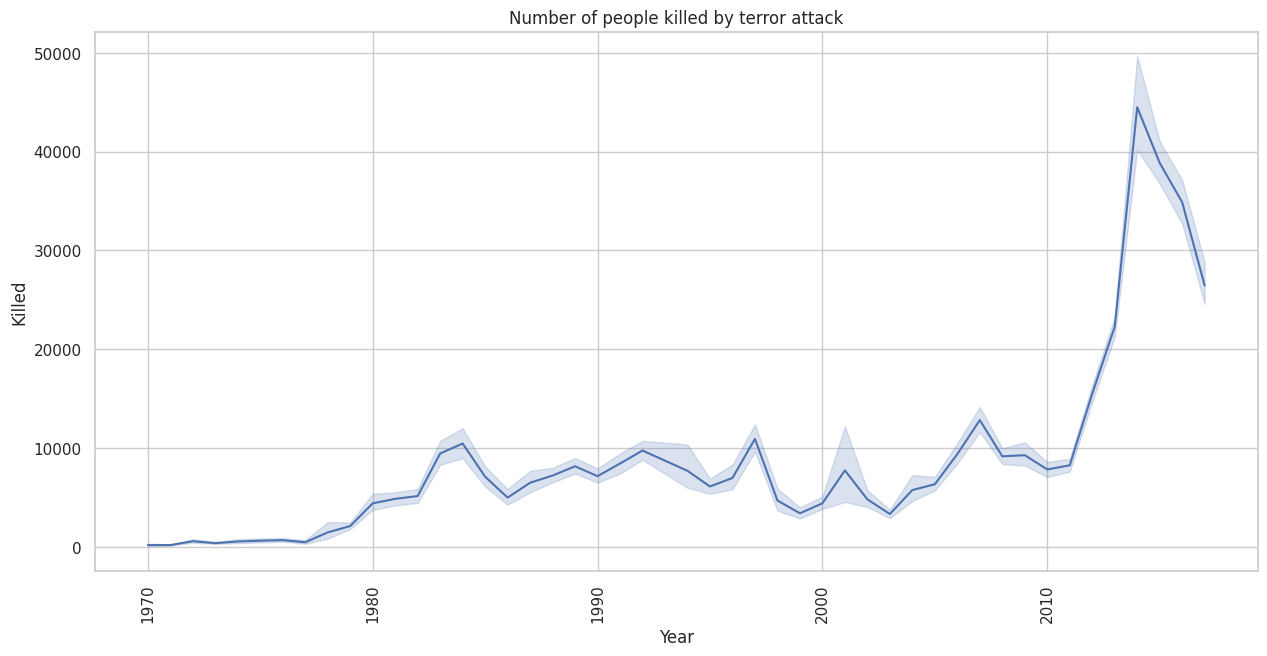

In [101]:
# Chart - 3 visualization code
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x='Year', y='Killed', estimator='sum')
plt.title('Number of people killed by terror attack')
plt.xticks(rotation=90)
plt.show()


why : A line plot was chosen to observe the trend of casualties over time.

**insight** : The insight is the severity of terrorist activities over the years in terms of human lives lost.

**Q. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

This could influence policy making, disaster management planning, insurance, and healthcare provisions. An increasing trend could lead to negative growth by discouraging population stability, investment, and development.

#**Analysis 1: Overall**

In [102]:
region = df_new['region_txt'].value_counts(normalize=True) * 100
region = region.reset_index()
region.rename(columns={'index': 'Region Name', 'region_txt': 'Percentage Of Incidents (%)'}, inplace=True)
region

,Region Name,Percentage Of Incidents (%)
0,Middle East & North Africa,27.780132
1,South Asia,24.753015
2,South America,10.445206
3,Sub-Saharan Africa,9.659257
4,Western Europe,9.157856
5,Southeast Asia,6.871557
6,Central America & Caribbean,5.693182
7,Eastern Europe,2.831180
8,North America,1.902131
9,East Asia,0.441409


In [103]:
print('Number of regions:', len(region))

Number of regions: 12


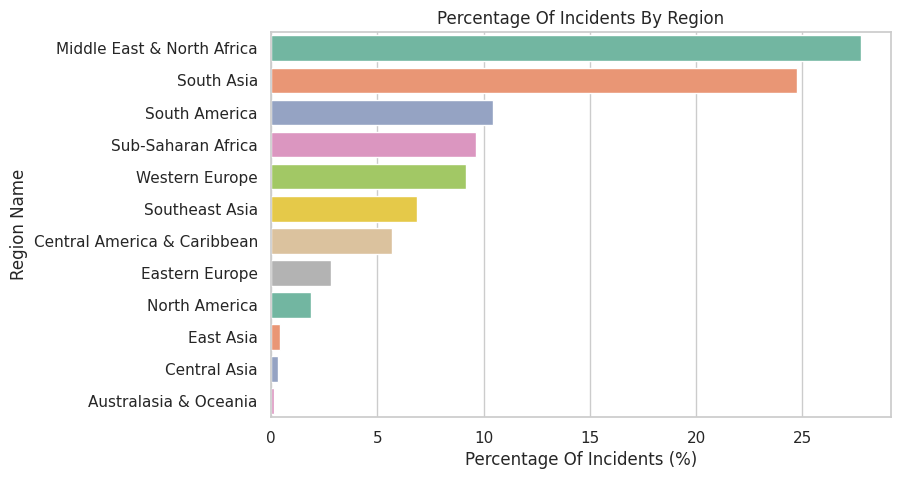

In [104]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(data=region,
              x='Percentage Of Incidents (%)',
              y='Region Name',
              orient='h',
              palette='Set2'
            )
plt.title('Percentage Of Incidents By Region')


plt.show()

In [105]:
# calculate total percentage of top 2 regions
region['Percentage Of Incidents (%)'][:2].sum()

52.53314693628192

Top 2 regions account for more than 50% of the total incidents in the world

In [106]:
country = df_new['country_txt'].value_counts()
country = country.reset_index()
country.rename(columns={'index': 'Country Name', 'country_txt': 'Number Of Incidents'}, inplace=True)
country.head()

,Country Name,Number Of Incidents
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [107]:
print('Number of countries:', len(country))

Number of countries: 201


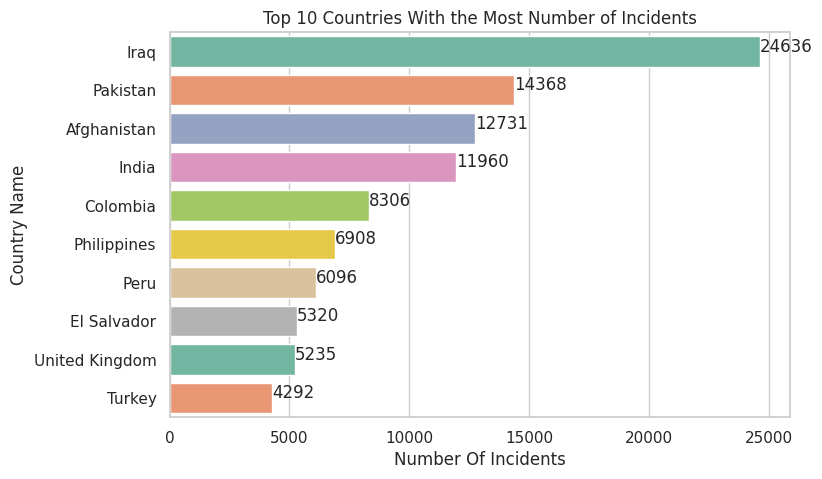

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=country[:10],
                x='Number Of Incidents',
                y='Country Name',
                orient='h',
                palette='Set2'
                )
plt.title('Top 10 Countries With the Most Number of Incidents')

# Adding annotations to the bars
for index, value in enumerate(country['Number Of Incidents'][:10]):
    plt.text(value, index, str(value))

plt.show()


In [109]:
# additional: check terrorism in India
India = df_new[df_new['country_txt'] == 'India']
India.head(5)

,iyear,imonth,iday,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,gname,attacktype1_txt,weaptype1_txt,nkill
1186,1972,2,22,India,28.585836,77.153336,South Asia,New Delhi,Airports & Aircraft,Aircraft (not at an airport),Palestinians,Hijacking,Explosives,0.0
2764,1975,1,2,India,25.863042,85.781004,South Asia,Samastipur,Government (General),"Government Personnel (excluding police, military)",Ananda Marga,Bombing/Explosion,Explosives,4.0
3857,1976,5,26,India,28.585836,77.153336,South Asia,New Delhi,Airports & Aircraft,Airport,Unknown,Bombing/Explosion,Explosives,0.0
5327,1977,9,28,India,19.075984,72.877656,South Asia,Bombay,Airports & Aircraft,Aircraft (not at an airport),Japanese Red Army (JRA),Hijacking,Firearms,0.0
7337,1979,1,13,India,26.200605,92.937574,South Asia,Unknown,Police,Police Patrol (including vehicles and convoys),Naga People,Armed Assault,Firearms,NaN


In [110]:
print('Number of attacks in India from 1970-2017 :', len(India))

Number of attacks in India from 1970-2017 : 11960


In [111]:
# get GeoDataFrame World Map from geopandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

<ipython-input-111-ef85cab52ae6>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [112]:
# merge country to world to draw map density of incidents
# use left join to keep all countries in geopandas's geodataframe that it can draw
# then fill Number Of Incidents column nan values with 0 for countries without terrorism data
world_merged = world.merge(country, left_on='name', right_on='Country Name', how='left')
world_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Number Of Incidents
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,17.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,59.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara,5.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,96.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


In [113]:
# check null
world_merged.isna().sum()

pop_est                 0
continent               0
name                    0
iso_a3                  0
gdp_md_est              0
geometry                0
Country Name           13
Number Of Incidents    13
dtype: int64

In [114]:
# fill null values with 0
world_merged['Number Of Incidents'].fillna(0, inplace=True)
world_merged.isna().sum()

pop_est                 0
continent               0
name                    0
iso_a3                  0
gdp_md_est              0
geometry                0
Country Name           13
Number Of Incidents     0
dtype: int64

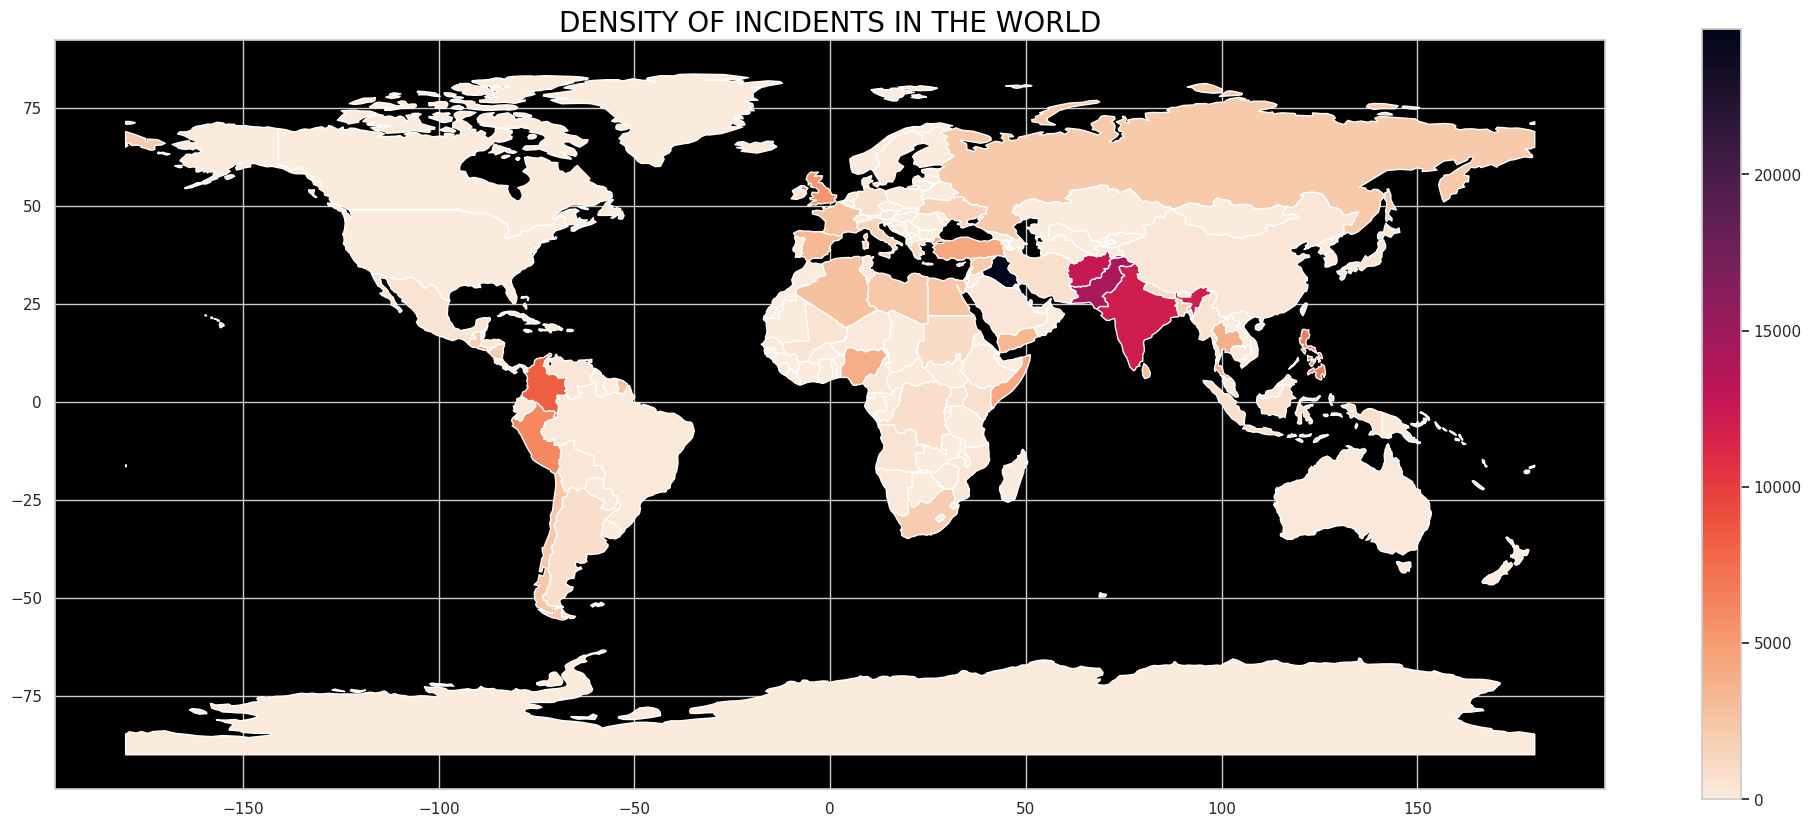

In [115]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_facecolor('black')

# Plot the world map with incidents
world_merged.plot(ax=ax, column='Number Of Incidents', cmap='rocket_r', legend=True, edgecolor='white')

# Set the title with white color
plt.title('DENSITY OF INCIDENTS IN THE WORLD', fontsize=20, color='black')

# Show the plot
plt.show()

--> Looking at the density map, it is not surprising that the area in the middle of the map is the darkest, which means the most terrorist attacks, namely the Middle East and North Africa, and South Asia. When these are areas with many political and military fluctuations. In addition, the north of North America is also a complex and volatile area.

References:

https://towardsdatascience.com/interactive-geographical-maps-with-geopandas-4586a9d7cc10
https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb#scrollTo=A91qAwyjOTs8
https://python-visualization.github.io/folium/quickstart.html

In [116]:
target_type = df_new['targtype1_txt'].value_counts(normalize=True) * 100
target_type = target_type.reset_index()
target_type.rename(columns={'index': 'Target Type', 'targtype1_txt': 'Percentage Of Incidents (%)'}, inplace=True)
target_type

,Target Type,Percentage Of Incidents (%)
0,Private Citizens & Property,23.947801
1,Military,15.401974
2,Police,13.487735
3,Government (General),11.713844
4,Business,11.375907
5,Transportation,3.742068
6,Utilities,3.314969
7,Unknown,3.246171
8,Religious Figures/Institutions,2.443709
9,Educational Institution,2.378764


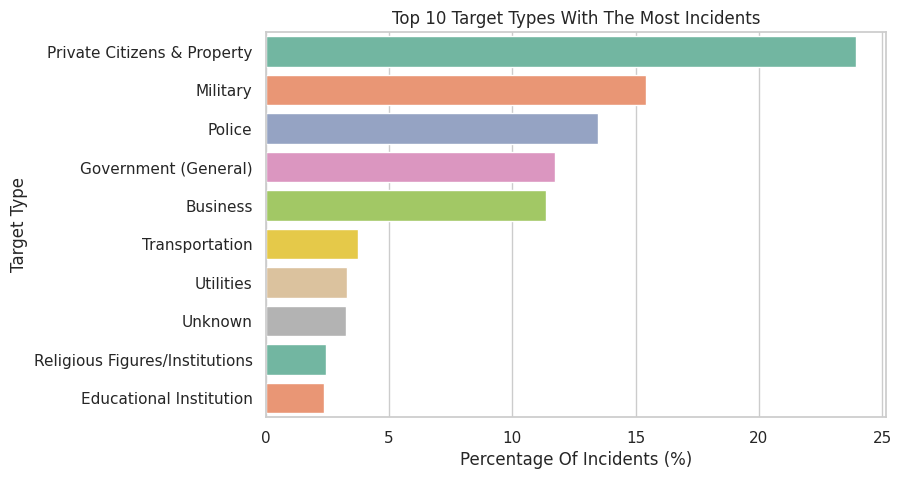

In [117]:
plt.figure(figsize=(8, 5))
sns.barplot(data=target_type[:10],
              x='Percentage Of Incidents (%)',
              y='Target Type',
              orient='h',
              palette='Set2')
plt.title('Top 10 Target Types With The Most Incidents')


plt.show()

--> Terrorist targets are mainly civilians and military.

In [118]:
df_1 = df_new[['region_txt', 'nkill']].copy()
df_1['nkill'] = df_1['nkill'].fillna(df['nkill'].median())

In [119]:
n_deaths = df_1.groupby('region_txt').sum().sort_values(by='nkill', ascending=False).reset_index()
n_deaths.rename(columns={'region_txt': 'Region Name', 'nkill': 'Number Of Fatalities'}, inplace=True)
n_deaths

,Region Name,Number Of Fatalities
0,Middle East & North Africa,137642.0
1,South Asia,101319.0
2,Sub-Saharan Africa,78386.0
3,South America,28849.0
4,Central America & Caribbean,28708.0
5,Southeast Asia,15637.0
6,Eastern Europe,7415.0
7,Western Europe,6694.0
8,North America,4916.0
9,East Asia,1152.0


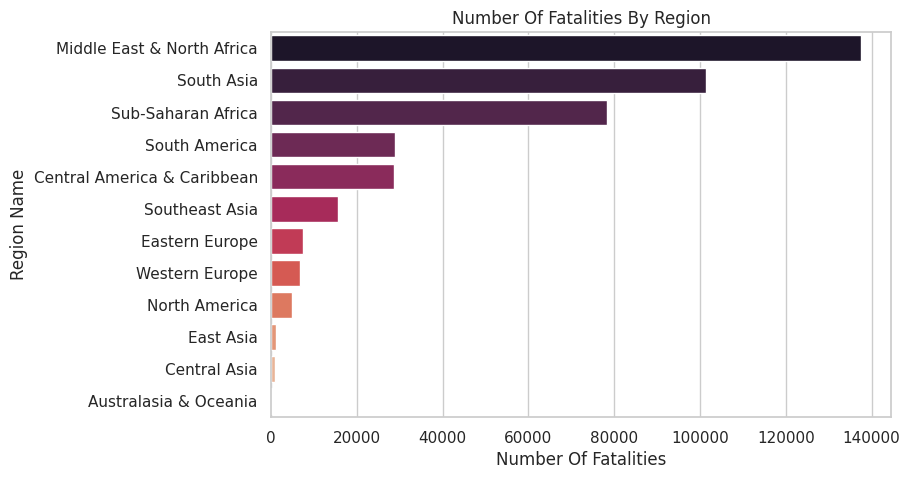

In [120]:
plt.figure(figsize=(8, 5))
sns.barplot(data=n_deaths,
              x='Number Of Fatalities',
              y='Region Name',
              orient='h',
              palette='rocket')
plt.title('Number Of Fatalities By Region')


plt.show()

In [121]:
n_deaths_avg = df_1.groupby('region_txt').mean().sort_values(by='nkill', ascending=False).reset_index()
n_deaths_avg.rename(columns={'region_txt': 'Region Name', 'nkill': 'Average Fatalities'}, inplace=True)
n_deaths_avg

,Region Name,Average Fatalities
0,Sub-Saharan Africa,4.466439
1,Central America & Caribbean,2.775329
2,Middle East & North Africa,2.726988
3,South Asia,2.252835
4,Central Asia,1.776199
5,South America,1.520129
6,Eastern Europe,1.441485
7,East Asia,1.436409
8,North America,1.422454
9,Southeast Asia,1.252463


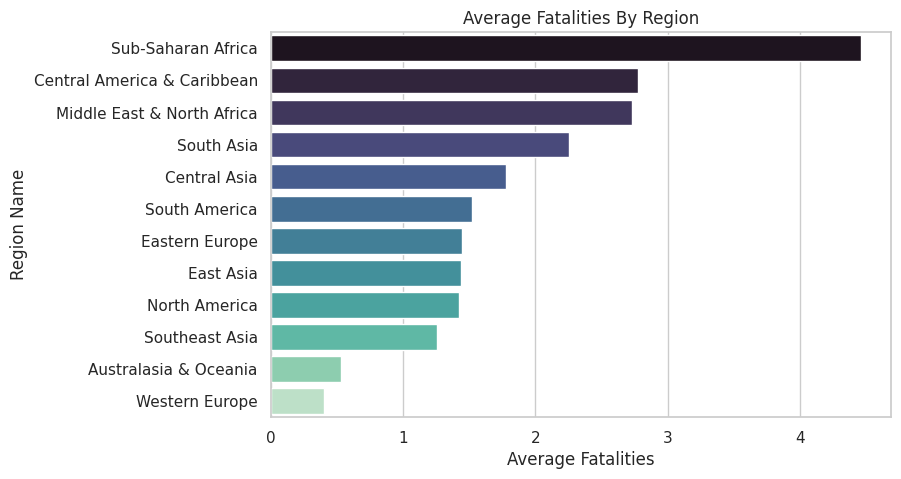

In [122]:
plt.figure(figsize=(8, 5))
sns.barplot(data=n_deaths_avg,
              x='Average Fatalities',
              y='Region Name',
              orient='h',
              palette='mako')
plt.title('Average Fatalities By Region')


plt.show()

In [123]:
attack_type = df['attacktype1_txt'].value_counts(normalize=True) * 100
attack_type = attack_type.reset_index()
attack_type.rename(columns={'index': 'Attack Type', 'attacktype1_txt': 'Percentage Of Usage (%)'}, inplace=True)
attack_type

,Attack Type,Percentage Of Usage (%)
0,Bombing/Explosion,48.574228
1,Armed Assault,23.484377
2,Assassination,10.629035
3,Hostage Taking (Kidnapping),6.141196
4,Facility/Infrastructure Attack,5.699787
5,Unknown,4.004601
6,Unarmed Assault,0.558641
7,Hostage Taking (Barricade Incident),0.545432
8,Hijacking,0.362704


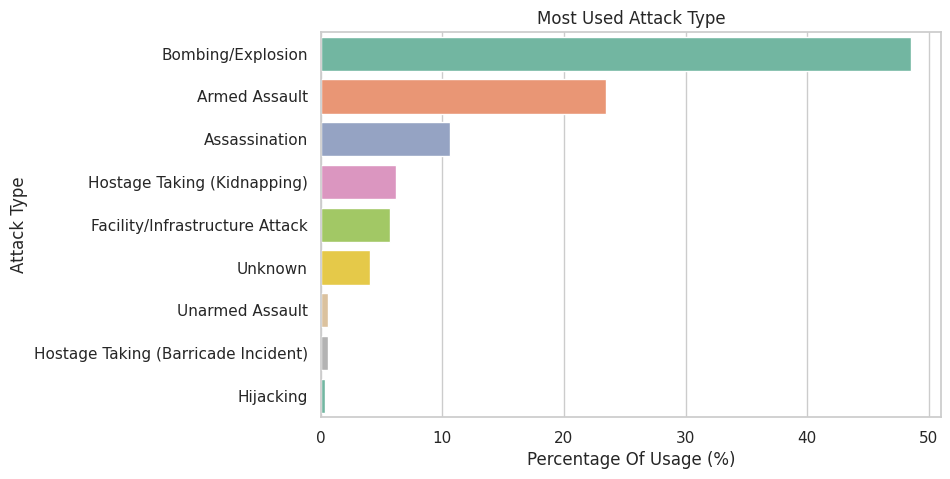

In [124]:
plt.figure(figsize=(8, 5))
sns.barplot(data=attack_type,
              x='Percentage Of Usage (%)',
              y='Attack Type',
              orient='h',
              palette='Set2')
plt.title('Most Used Attack Type')


plt.show()

#**Analysis 2: Target Type Trend Of Regions And How They Change From Region to Region?**

In [125]:
df_2 = df_new[['region_txt', 'targtype1_txt']].copy()
df_2.head(12)

,region_txt,targtype1_txt
0,Central America & Caribbean,Private Citizens & Property
1,North America,Government (Diplomatic)
2,Southeast Asia,Journalists & Media
3,Western Europe,Government (Diplomatic)
4,East Asia,Government (Diplomatic)
5,North America,Police
6,South America,Police
7,North America,Utilities
8,North America,Military
9,North America,Government (General)


In [126]:
df_2['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [127]:
# create an ordered list of regions from West to East
order_regions = ['North America', 'Central America & Caribbean', 'South America', 'Western Europe', 'Eastern Europe',
                 'Sub-Saharan Africa', 'Middle East & North Africa', 'Central Asia','South Asia', 'East Asia', 'Southeast Asia', 'Australasia & Oceania']

In [128]:
region_grouped = df_2.groupby(['region_txt'])['targtype1_txt'].value_counts(normalize=True) * 100
region_group_new = region_grouped.groupby(level=[0]).nlargest(5).rename('Percentage Incidents (%)').reset_index(level=[0, 2])
region_group_new = region_group_new.loc[order_regions].reset_index(drop=True) # rearrange order of regions and drop index
region_group_new

,region_txt,targtype1_txt,Percentage Incidents (%)
0,North America,Business,26.186343
1,North America,Private Citizens & Property,13.541667
2,North America,Government (General),11.979167
3,North America,Abortion Related,7.465278
4,North America,Police,6.799769
5,Central America & Caribbean,Military,29.630704
6,Central America & Caribbean,Private Citizens & Property,14.510828
7,Central America & Caribbean,Utilities,11.861949
8,Central America & Caribbean,Business,11.513921
9,Central America & Caribbean,Government (General),10.740526


In [129]:
region_group_new['Rank'] = region_group_new.groupby('region_txt')['Percentage Incidents (%)'].rank('min', ascending=False).astype(int)
region_group_new

,region_txt,targtype1_txt,Percentage Incidents (%),Rank
0,North America,Business,26.186343,1
1,North America,Private Citizens & Property,13.541667,2
2,North America,Government (General),11.979167,3
3,North America,Abortion Related,7.465278,4
4,North America,Police,6.799769,5
5,Central America & Caribbean,Military,29.630704,1
6,Central America & Caribbean,Private Citizens & Property,14.510828,2
7,Central America & Caribbean,Utilities,11.861949,3
8,Central America & Caribbean,Business,11.513921,4
9,Central America & Caribbean,Government (General),10.740526,5


**RANKING TABLE**

In [130]:
# create ranking table target types of each regions
ranking_table = region_group_new.pivot_table(index='Rank',
                                             columns='region_txt',
                                             values='targtype1_txt',
                                             aggfunc=','.join)
ranking_table = ranking_table[order_regions].copy()
ranking_table

region_txt,North America,Central America & Caribbean,South America,Western Europe,Eastern Europe,Sub-Saharan Africa,Middle East & North Africa,Central Asia,South Asia,East Asia,Southeast Asia,Australasia & Oceania
Rank,,,,,,,,,,,,
1,Business,Military,Business,Business,Military,Private Citizens & Property,Private Citizens & Property,Government (General),Private Citizens & Property,Transportation,Private Citizens & Property,Government (General)
2,Private Citizens & Property,Private Citizens & Property,Private Citizens & Property,Private Citizens & Property,Police,Military,Military,Military,Police,Government (General),Military,Business
3,Government (General),Utilities,Government (General),Government (General),Private Citizens & Property,Government (General),Police,Private Citizens & Property,Military,Business,Government (General),Private Citizens & Property
4,Abortion Related,Business,Police,Police,Government (General),Police,Government (General),Police,Government (General),Police,Business,Police
5,Police,Government (General),Utilities,Military,Business,Business,Business,Business,Business,Private Citizens & Property,Police,Government (Diplomatic)


Looking at the table above, we can:
1. Easily read the names of the top 5 target types of each region.
2. Finding the similar and different target types of each pair of regions.




In [131]:
print('Number of unique target types in the ranking table:', region_group_new['targtype1_txt'].nunique())

Number of unique target types in the ranking table: 9


- Lets take a look at the number of unique values, there are only 9 unique target types in all 12 regions.
- In general, there's not much shuffling of target types in 12 regions. Therefore top 5 target types of the regions are only within range of 9 unique target types. That means there are many common target types between them. So what's the difference?

Look at the chart below to have a more general and in-depth view accross all regions.


In [132]:
# filter out some necessary target types
region_group_new_filtered = region_group_new[region_group_new['targtype1_txt'].isin(['Private Citizens & Property', 'Business', 'Military', 'Abortion Related', 'Transportation', 'Government (Diplomatic)'])].copy()

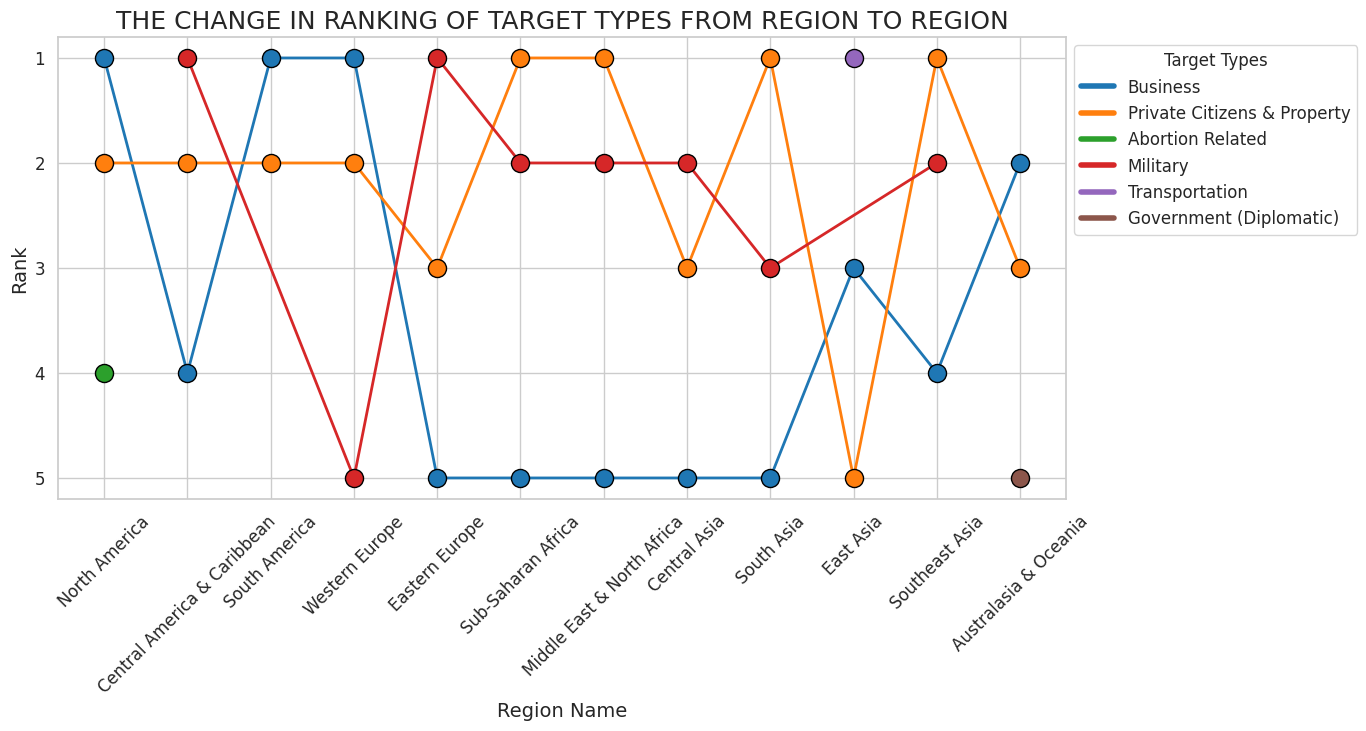

In [133]:
# create a chart showing the change in rank of each target from region to region

plt.figure(figsize=(13, 6))
sns.lineplot(data=region_group_new_filtered,
              x='region_txt',
              y='Rank',
              hue='targtype1_txt',
              marker='o',
              markersize=13,
              markeredgecolor='black',
              markeredgewidth=1,
              palette='tab10',
              linewidth=2)

plt.gca().invert_yaxis()

plt.xticks(rotation=45, fontsize=12)
plt.yticks(ticks=range(1, 6), fontsize=12)

plt.xlabel('Region Name', fontsize=14)
plt.ylabel('Rank', fontsize=14)

leg = plt.legend(title='Target Types', fontsize=12, bbox_to_anchor=(1, 1))
for i in range(6):
  leg.get_lines()[i].set_linewidth(4)

plt.title('THE CHANGE IN RANKING OF TARGET TYPES FROM REGION TO REGION', fontsize=18)

plt.show()


This chart is called Bump Chart.

https://thinkinsights.net/digital/bump-chart/?fbclid=IwAR1EJjEEKzBjOHRSY6RV1ofWBS6yttZGsK88vamrbKqU_mx1InwyYW6r1Ls


- In the common target types, there is still the difference in rank of them. This represents the difference in priority of each region for target types. For example of some remarkable target types:
 - The blue line shows the priority for the 'Business' target type in regions with developed economies such as North America, South America, Western Europe, Australasia & Oceania.
 - The red line shows the priority for the 'Military' target type in regions that are inherently politically and militarily unstable such as Central America & Caribbean, Eastern Europe, Middle East & North Africa, etc.
 - We can also see a very clear contrast of these two lines, when one has a high rank, the other has a low rank and vice versa.
 - It's no suprise that the orange line represents for 'Private Citizens & Property' target type which is usually get high rank because it ranked 1st in overall
- In addition, there are individual markers and are not linked to any other markers of the same color, which means that these target types are completely outside the top 5 of the other regions. This makes the region have its own remarkable feature. For instance, bottom right brown marker represents for 'Government (Diplomatic)' target type in Australasia & Oceania region.
- However, there is a very **special** marker in these markers when it's not only outside the top 5 of other regions but also ranked 1st in one region, which is **purple** marker near the top right corner. Yes, this marker represents for **Transportation** target type in East Asia region. But why?


#**Analysis 3: Why Transportation Is A Top Terrorist Target Type In East Asia Region?**

In [134]:
df_3 = df_new[df_new['region_txt'] == 'East Asia'][['iyear', 'country_txt', 'latitude', 'longitude', 'region_txt', 'city', 'targtype1_txt', 'targsubtype1_txt',
                                                    'attacktype1_txt', 'weaptype1_txt']].copy()
df_3.head()

,iyear,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,attacktype1_txt,weaptype1_txt
4,1970,Japan,33.580412,130.396361,East Asia,Fukouka,Government (Diplomatic),Embassy/Consulate,Facility/Infrastructure Attack,Incendiary
162,1970,Japan,33.580412,130.396361,East Asia,Fukouka,Airports & Aircraft,Aircraft (not at an airport),Hijacking,Explosives
1085,1971,Taiwan,23.583333,119.583330,East Asia,Unknown,Airports & Aircraft,Aircraft (not at an airport),Bombing/Explosion,Explosives
1851,1973,Japan,35.281341,139.672200,East Asia,Yokosuka,Military,Military Barracks/Base/Headquarters/Checkpost,Facility/Infrastructure Attack,Incendiary
2003,1973,Japan,35.689125,139.747742,East Asia,Tokyo,Government (Diplomatic),Embassy/Consulate,Facility/Infrastructure Attack,Incendiary


In [135]:
df_3.shape

(802, 10)

In [136]:
trans = df_3[df_3['targtype1_txt'] == 'Transportation'].copy()
trans.head()

,iyear,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,attacktype1_txt,weaptype1_txt
6600,1978,Japan,35.689125,139.747742,East Asia,Tokyo,Transportation,Bus (excluding tourists),Facility/Infrastructure Attack,Incendiary
7868,1979,Japan,34.693738,135.502165,East Asia,Osaka,Transportation,Bridge/Car Tunnel,Facility/Infrastructure Attack,Incendiary
10171,1980,China,22.281867,114.161326,East Asia,Hong Kong,Transportation,Bus (excluding tourists),Bombing/Explosion,Explosives
13108,1981,Japan,35.689125,139.747742,East Asia,Tokyo,Transportation,Train/Train Tracks/Trolley,Facility/Infrastructure Attack,Incendiary
26756,1985,Japan,35.689125,139.747742,East Asia,Tokyo,Transportation,Train/Train Tracks/Trolley,Facility/Infrastructure Attack,Incendiary


In [137]:
trans.shape

(148, 10)

In [138]:
print('Countries in East Asia Region:', df_3['country_txt'].unique())
# there is also a Mongolia but we don't have data on this country

Countries in East Asia Region: ['Japan' 'Taiwan' 'South Korea' 'China' 'North Korea']


In [139]:
print('Number of incidents in East Asia Region:', len(df_3))

Number of incidents in East Asia Region: 802


Looking back the charts in overall section, East Asia Region ranked 3rd from bottom and Transportation target type still ranks quite high, when it's ranked 6th in overall

In [140]:
print('Number of incidents on Transportation target type in East Asia:', len(trans))

Number of incidents on Transportation target type in East Asia: 148


In [141]:
east_asia_target_type = df_3['targtype1_txt'].value_counts()
east_asia_target_type = east_asia_target_type.reset_index()
east_asia_target_type.rename(columns={'index': 'Target Type', 'targtype1_txt': 'Number Of Incidents'}, inplace=True)
east_asia_target_type.head()

,Target Type,Number Of Incidents
0,Transportation,148
1,Government (General),128
2,Business,102
3,Police,98
4,Private Citizens & Property,97


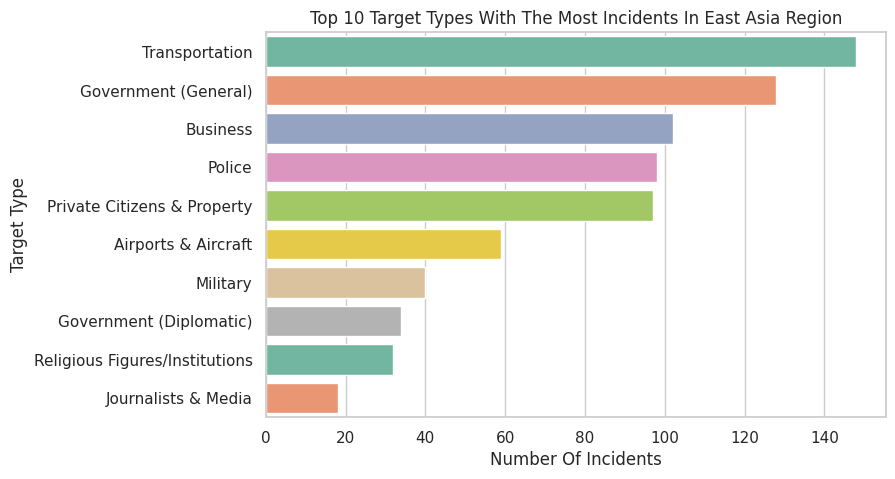

In [142]:
plt.figure(figsize=(8, 5))
sns.barplot(data=east_asia_target_type[:10],
              x='Number Of Incidents',
              y='Target Type',
              orient='h',
              palette='Set2')
plt.title('Top 10 Target Types With The Most Incidents In East Asia Region')


plt.show()

In [143]:
east_asia_country = trans['country_txt'].value_counts()
east_asia_country = east_asia_country.reset_index()
east_asia_country.rename(columns={'index': 'Country Name', 'country_txt': 'Number Of Incidents'}, inplace=True)
east_asia_country.head()

,Country Name,Number Of Incidents
0,China,83
1,Japan,52
2,Taiwan,13


Lets plot the location of terrorist attacks on Transportation in East Asia region

In [144]:
trans_map = trans[['iyear', 'country_txt', 'city', 'latitude', 'longitude', 'targsubtype1_txt']].copy()

In [145]:
# check null
trans_map.isna().sum()

iyear               0
country_txt         0
city                0
latitude            3
longitude           3
targsubtype1_txt    0
dtype: int64

In [146]:
# drop null
trans_map.dropna(inplace=True)
trans_map.isna().sum()

iyear               0
country_txt         0
city                0
latitude            0
longitude           0
targsubtype1_txt    0
dtype: int64

In [147]:
east_asia_map = world[world['name'].isin(['Japan', 'Mongolia', 'Taiwan', 'South Korea', 'China', 'North Korea'])]
east_asia_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
95,2.566616e+07,Asia,North Korea,PRK,40000,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ..."
96,5.170910e+07,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."
97,3.225167e+06,Asia,Mongolia,MNG,13996,"POLYGON ((87.75126 49.29720, 88.80557 49.47052..."
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
140,2.356838e+07,Asia,Taiwan,TWN,1127000,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."


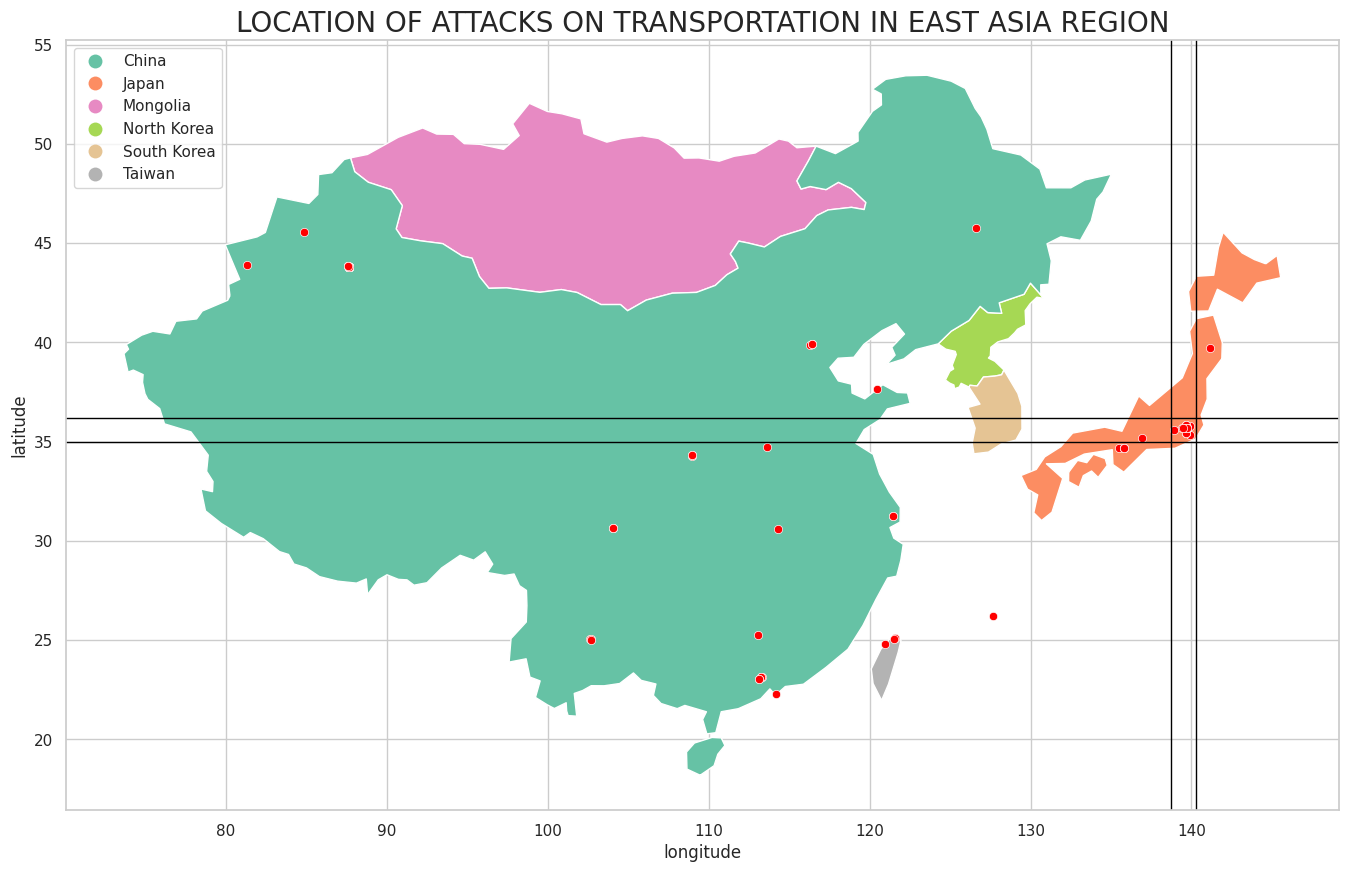

In [148]:
# plot the map of east asia region
east_asia_map.plot(column='name', legend=True, cmap='Set2', figsize=(25, 10))
sns.scatterplot(data=trans,
                x='longitude',
                y='latitude',
                color='red')
plt.axhline(35, linewidth=1, c='black')
plt.axhline(36.2, linewidth=1, c='black')
plt.axvline(138.7, linewidth=1, c='black')
plt.axvline(140.3, linewidth=1, c='black')
plt.title('LOCATION OF ATTACKS ON TRANSPORTATION IN EAST ASIA REGION', fontsize=20)
plt.show()

In [149]:
trans_map['city'] = trans_map['city'].str.replace('tokyo', 'Tokyo')

In [150]:
japan = trans_map[trans_map['country_txt'] == 'Japan']['city'].value_counts()
japan = japan.reset_index()
japan.rename(columns={'index': 'City Name', 'city': 'Number Of Incidents'}, inplace=True)
japan.head()

,City Name,Number Of Incidents
0,Tokyo,29
1,Unknown,9
2,Yokohama,4
3,Osaka,1
4,Naha,1


In [151]:
# get all location of points inside the square
df_japan = trans_map[trans_map['longitude'].between(138.7, 140.3) & trans_map['latitude'].between(35, 36.2)].copy()
df_japan['iyear'] = df_japan['iyear'].astype(str)
# create a label column to make popup later
df_japan['label'] = df_japan['iyear'] + ' - ' + df_japan['targsubtype1_txt']
df_japan.head()

,iyear,country_txt,city,latitude,longitude,targsubtype1_txt,label
6600,1978,Japan,Tokyo,35.689125,139.747742,Bus (excluding tourists),1978 - Bus (excluding tourists)
13108,1981,Japan,Tokyo,35.689125,139.747742,Train/Train Tracks/Trolley,1981 - Train/Train Tracks/Trolley
26756,1985,Japan,Tokyo,35.689125,139.747742,Train/Train Tracks/Trolley,1985 - Train/Train Tracks/Trolley
29210,1986,Japan,Tokyo,35.689125,139.747742,Train/Train Tracks/Trolley,1986 - Train/Train Tracks/Trolley
33637,1988,Japan,Tokyo,35.689125,139.747742,Taxi/Rickshaw,1988 - Taxi/Rickshaw


In [152]:
center_point = [(35 + 36.2) / 2, (138.7 + 140.3) / 2]
center_point

[35.6, 139.5]

In [153]:
japan_map = folium.Map(location=center_point, zoom_start=10)
for lat, lng, label in zip(df_japan.latitude, df_japan.longitude, df_japan.label):
  folium.Marker(
      location=[lat, lng],
      popup=folium.Popup(f"<b>{label}</b>", show=True),
      icon=folium.Icon(color='red'),
  ).add_to(japan_map)
japan_map

In [154]:
japan_map.save('japan_map_terrorism.html') # save as .html file

Generally, most attacks on the transportation system in Japan are on the train, subway system and in the city center with a large number of residents and dense traffic system. How about the whole East Asia?

In [155]:
targsubtype1 = trans['targsubtype1_txt'].value_counts()
targsubtype1 = targsubtype1.reset_index()
targsubtype1.rename(columns={'index': 'Target Sub-Type', 'targsubtype1_txt': 'Number Of Incidents'}, inplace=True)
targsubtype1

,Target Sub-Type,Number Of Incidents
0,Train/Train Tracks/Trolley,101
1,Bus (excluding tourists),25
2,Highway/Road/Toll/Traffic Signal,12
3,Subway,8
4,Bridge/Car Tunnel,1
5,Taxi/Rickshaw,1


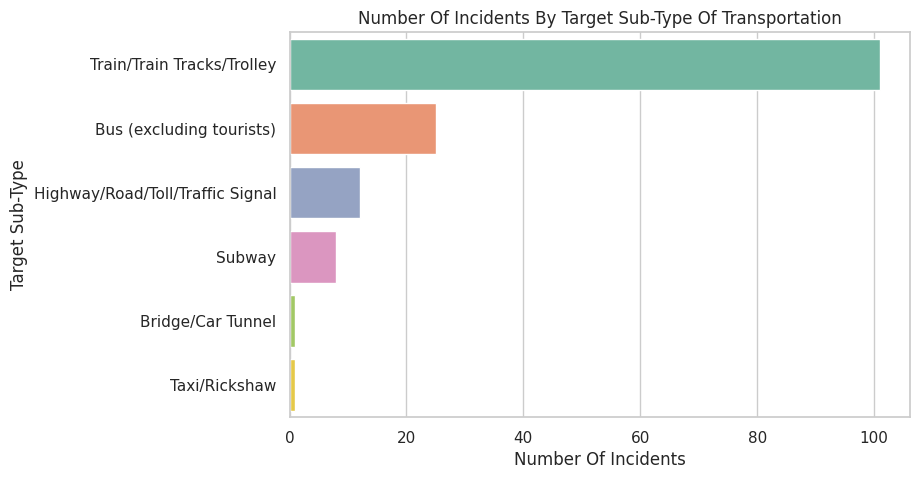

In [156]:
plt.figure(figsize=(8, 5))
sns.barplot(data=targsubtype1,
              x='Number Of Incidents',
              y='Target Sub-Type',
              orient='h',
              palette='Set2')
plt.title('Number Of Incidents By Target Sub-Type Of Transportation')


plt.show()

Train target type is still ranked 1st and leave the rest. It's quite understandable, because, as we all know that almost developed countries in East Asia like China or Japan have a very large subway system. This partly explains the reason why transportation is the number 1 target type.

In terms of geographical location of attacks, they will usually take place in big cities with dense traffic systems and crowded places like subways. In order to cause great damage to people and property, as well as partly possible to prevent trade and indirectly destroy the economy.


To answer the question more completely, continue to analyse the timeline of the terrorist attacks in China and Japan.

In [157]:
df_timeline = trans[(trans['country_txt'] == 'China') | (trans['country_txt'] == 'Japan')][['iyear', 'country_txt']]
df_timeline.head()

,iyear,country_txt
6600,1978,Japan
7868,1979,Japan
10171,1980,China
13108,1981,Japan
26756,1985,Japan


In [158]:
timeline = df_timeline.groupby(['country_txt', 'iyear'])['country_txt'].count()
timeline.rename('Number of Incidents', inplace=True)
timeline = timeline.reset_index()
timeline.head()

,country_txt,iyear,Number of Incidents
0,China,1980,1
1,China,1989,1
2,China,1990,1
3,China,1992,2
4,China,1994,5


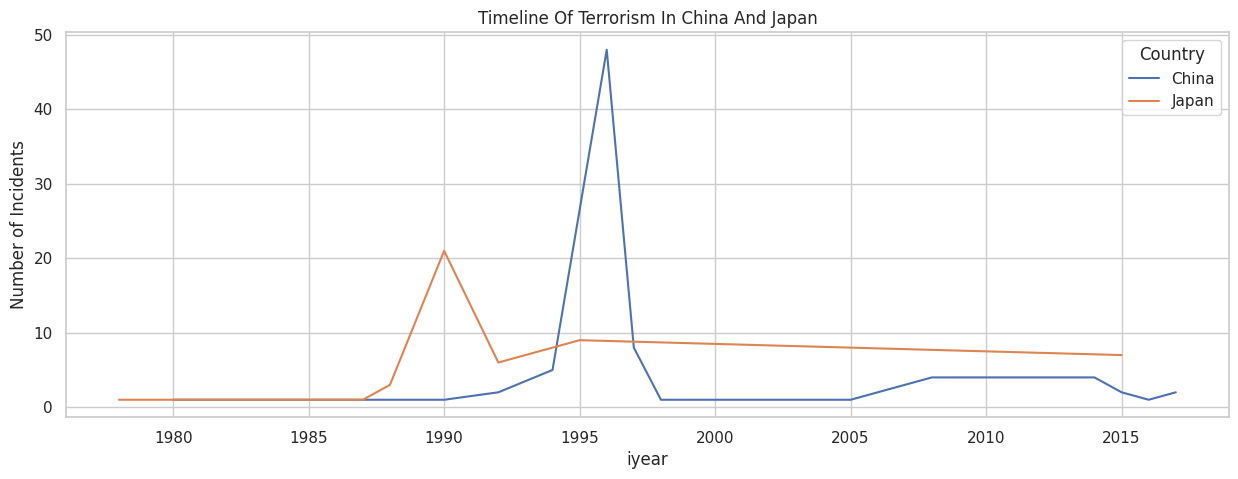

In [159]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=timeline,
              x='iyear',
              y='Number of Incidents',
              hue='country_txt')

plt.title('Timeline Of Terrorism In China And Japan')
plt.legend(title='Country')

plt.show()

Tokyo subway attack of 1995, coordinated multiple-point terrorist attack in Tokyo on March 20, 1995, in which the odourless, colourless, and highly toxic nerve gas sarin developed by the Nazis was released in the city’s subway system. It was the worst domestic terror attack ever carried out on Japanese soil, the attack resulted in the deaths of 12 (later increased to 13) people, and some 5,500 others were injured to varying degrees. The culprits were AUM Shinrikyo, an obscure religious group who believed the end of the world was coming. Members of the Japan-based new religious movement AUM Shinrikyo (since 2000 called Aleph) were soon identified as the perpetrators of the attack.

![](https://cdn.britannica.com/91/162991-050-6DBE177B/terrorist-attack-wake-AUM-Shinrikyo-sarin-nerve-March-20-1995.jpg)



https://www.bbc.com/news/world-asia-35975069

https://www.britannica.com/event/Tokyo-subway-attack-of-1995

https://en.wikipedia.org/wiki/Tokyo_subway_sarin_attack

The main cause of the transportation terrorist attacks in China around since 1990 was relevant to the course of Uyghur-related violence in Xinjiang and Central Asia. The locations and types of violent incidents were influenced by a combination of Chinese government policies and the political geography of Xinjiang.

https://www.jstor.org/stable/41447781

https://en.wikipedia.org/wiki/Uyghur_genocide

https://en.wikipedia.org/wiki/Terrorism_in_China

##**Conclusion**

The main reason why the Transportation has become the most targeted type of terrorist is because almost developed countries in East Asia like China or Japan have a very large subway system. Therefore, they will often take place in big cities with dense traffic systems and crowded places like subways. In order to cause great damage to people and property, as well as prevent trade.
As well as some people's misguided beliefs, and being influenced by attacks related to government and border policies.

# **Analysis 4 : Identification of the Most Prolific Terrorist Group and their Weaponry**

## **Identify Top Terror Attack Group**

In [160]:
df_new.head()

,iyear,imonth,iday,country_txt,latitude,longitude,region_txt,city,targtype1_txt,targsubtype1_txt,gname,attacktype1_txt,weaptype1_txt,nkill
0,1970,7,2,Dominican Rep.,18.456792,-69.951164,Central America & Caribbean,Santo Domingo,Private Citizens & Property,Named Civilian,MANO-D,Assassination,Unknown,1.0
1,1970,0,0,Mexico,19.371887,-99.086624,North America,Mexico city,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Hostage Taking (Kidnapping),Unknown,0.0
2,1970,1,0,Philippines,15.478598,120.599741,Southeast Asia,Unknown,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Assassination,Unknown,1.0
3,1970,1,0,Greece,37.997490,23.762728,Western Europe,Athens,Government (Diplomatic),Embassy/Consulate,Unknown,Bombing/Explosion,Explosives,NaN
4,1970,1,0,Japan,33.580412,130.396361,East Asia,Fukouka,Government (Diplomatic),Embassy/Consulate,Unknown,Facility/Infrastructure Attack,Incendiary,NaN


In [161]:
groups = df_new[['attacktype1_txt','gname','weaptype1_txt','targtype1_txt']]
group_counts = groups['gname'].value_counts()

sorted_groups = group_counts.sort_values(ascending=False)

# Step 3: Select the top 10 most frequent groups
sorted_groups = sorted_groups.iloc[1:]
top_10_groups = sorted_groups.head(10)
top_10_groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: gname, dtype: int64

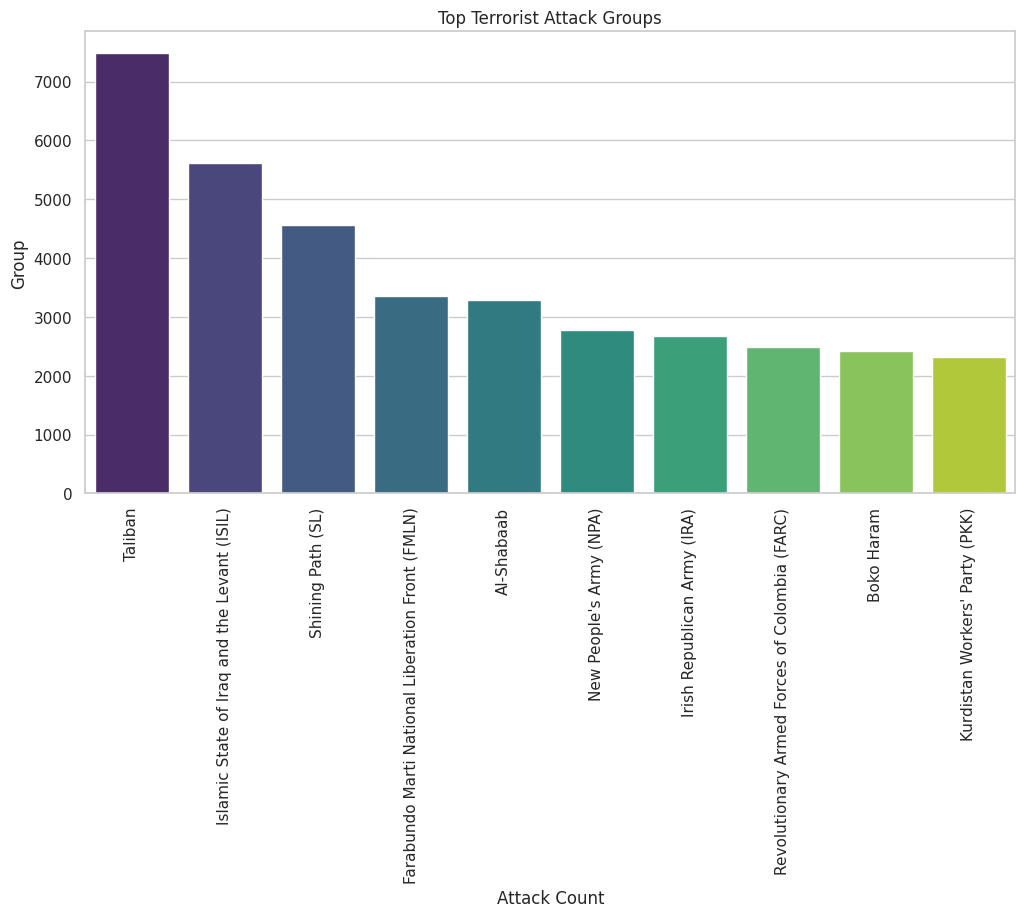

In [162]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_groups.index, y=top_10_groups.values, palette="viridis")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 90)
plt.show()

## **Methods of Attack used by each group**

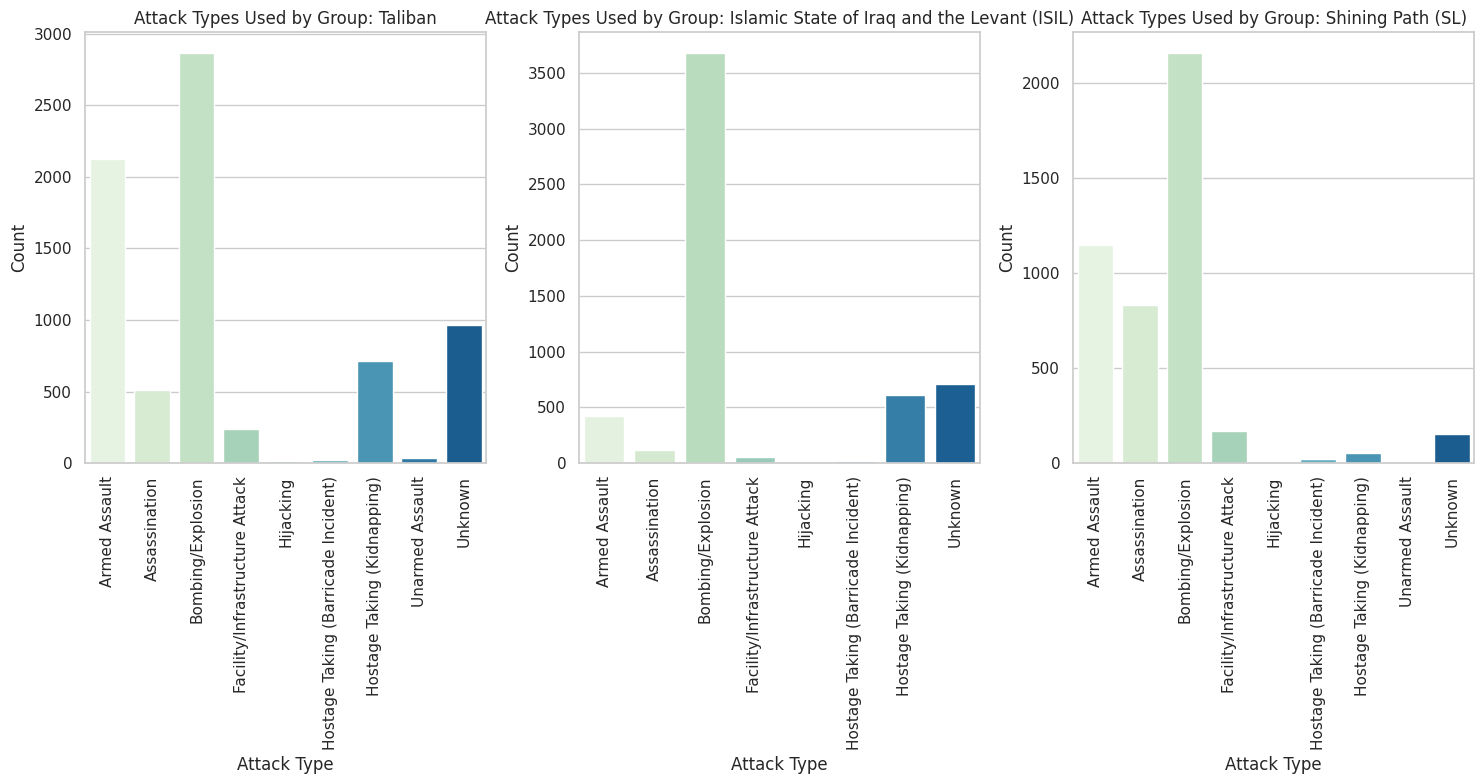

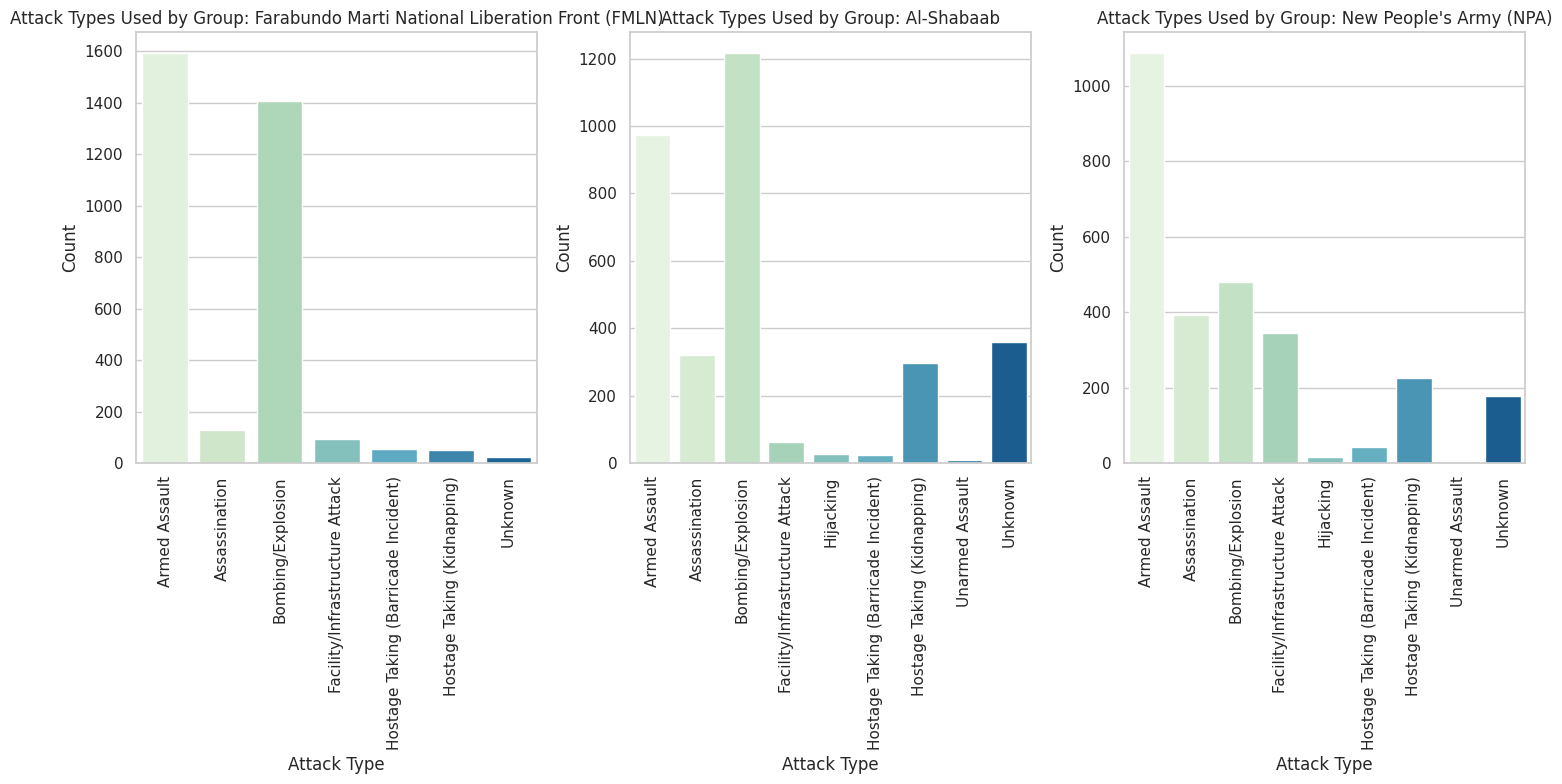

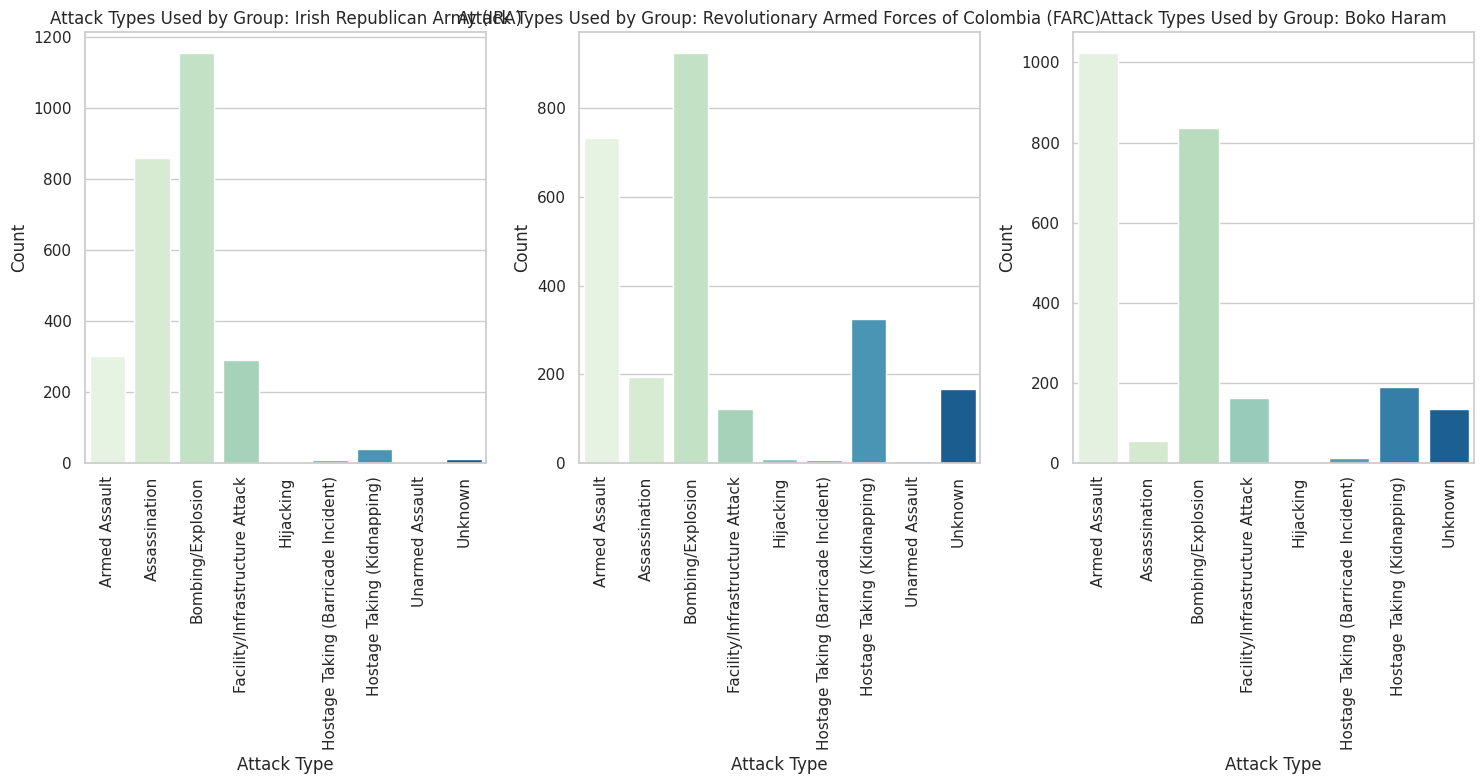

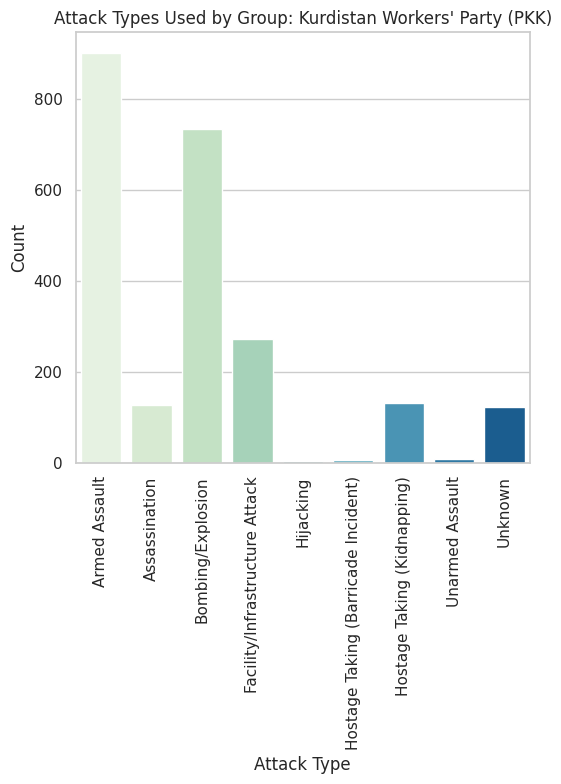

In [169]:
import math
grouped_data = groups.groupby(['gname', 'attacktype1_txt']).size().reset_index(name='Count')
groups_name= sorted_groups.index[:10]

# Number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = math.ceil(len(groups_name) / plots_per_row)

# Plotting in rows
for row in range(num_rows):
    plt.figure(figsize=(15, 8))

    # Iterate over each plot in the row
    for col in range(plots_per_row):
        # Calculate the index of the current group in the overall list
        index = row * plots_per_row + col

        # Check if the index is within the range of groups_name
        if index < len(groups_name):
            group_name = groups_name[index]

            # Filter data for the specific group
            group_data = grouped_data[grouped_data['gname'] == group_name]

            # Create subplots
            plt.subplot(1, plots_per_row, col + 1)

            # Plot the bar chart
            sns.barplot(x=group_data['attacktype1_txt'], y=group_data['Count'], palette='GnBu')
            plt.xlabel('Attack Type')
            plt.ylabel('Count')
            plt.title(f'Attack Types Used by Group: {group_name}')
            plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()


## **Check the trend by top 10 terrorist groups their favourite target types**

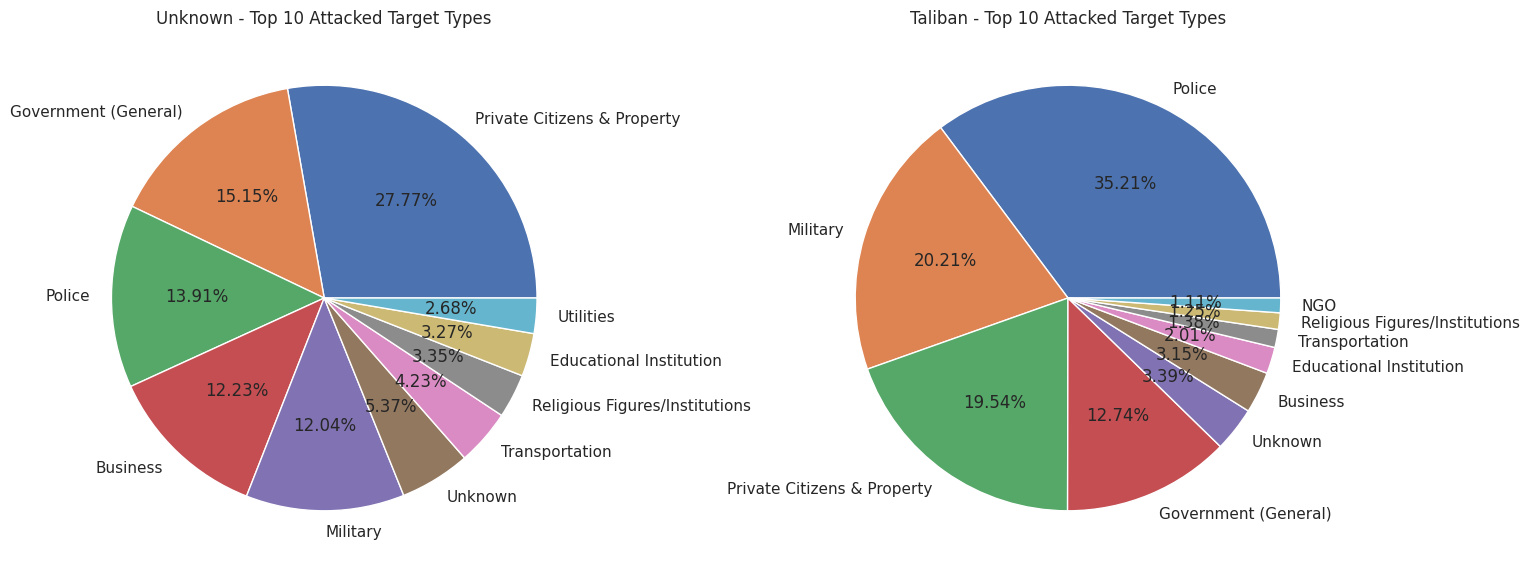

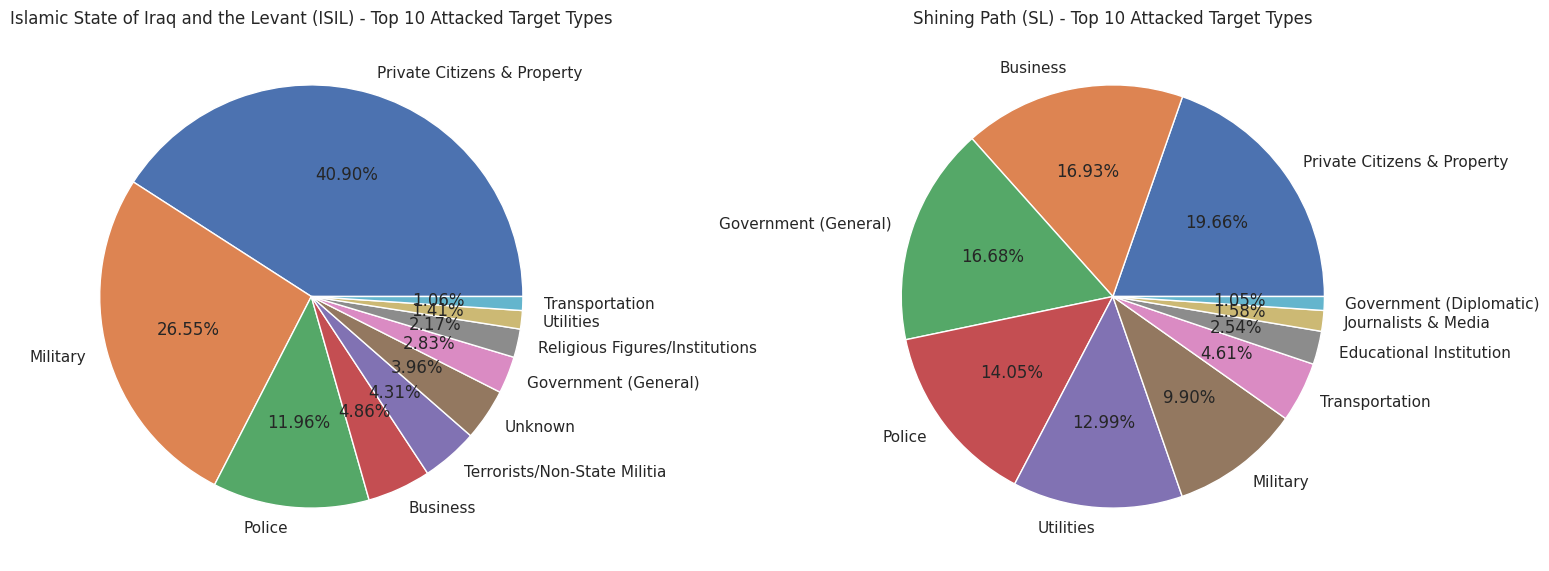

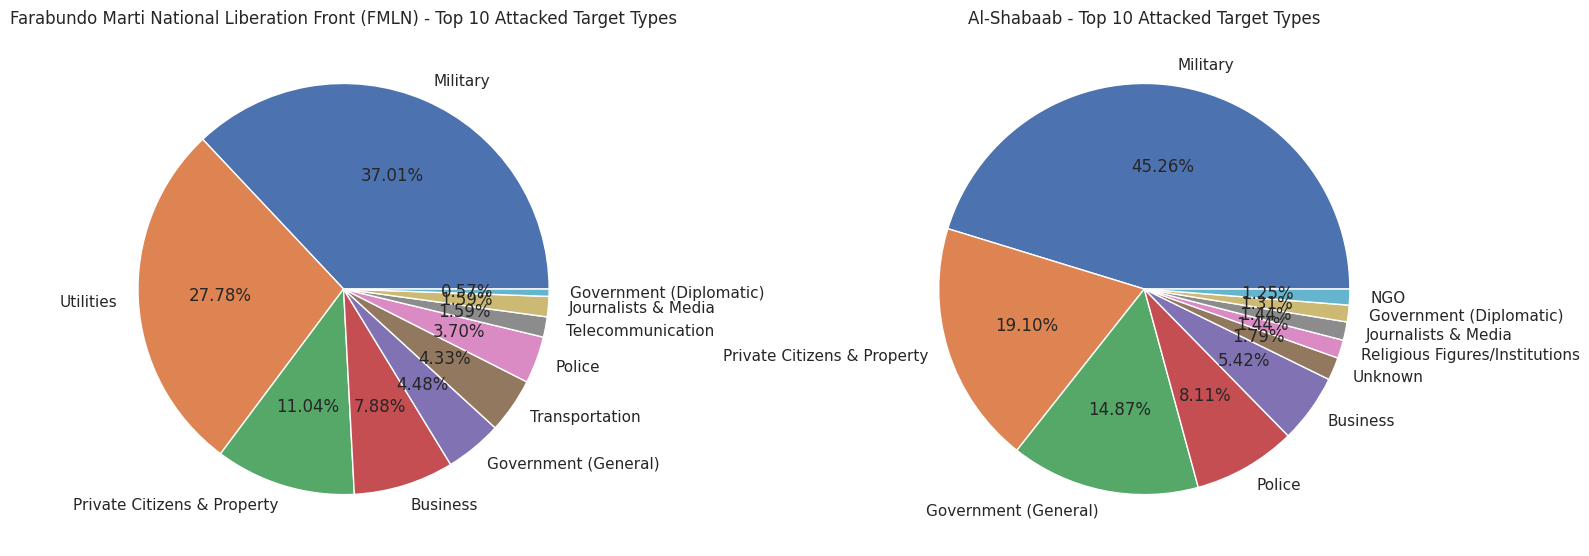

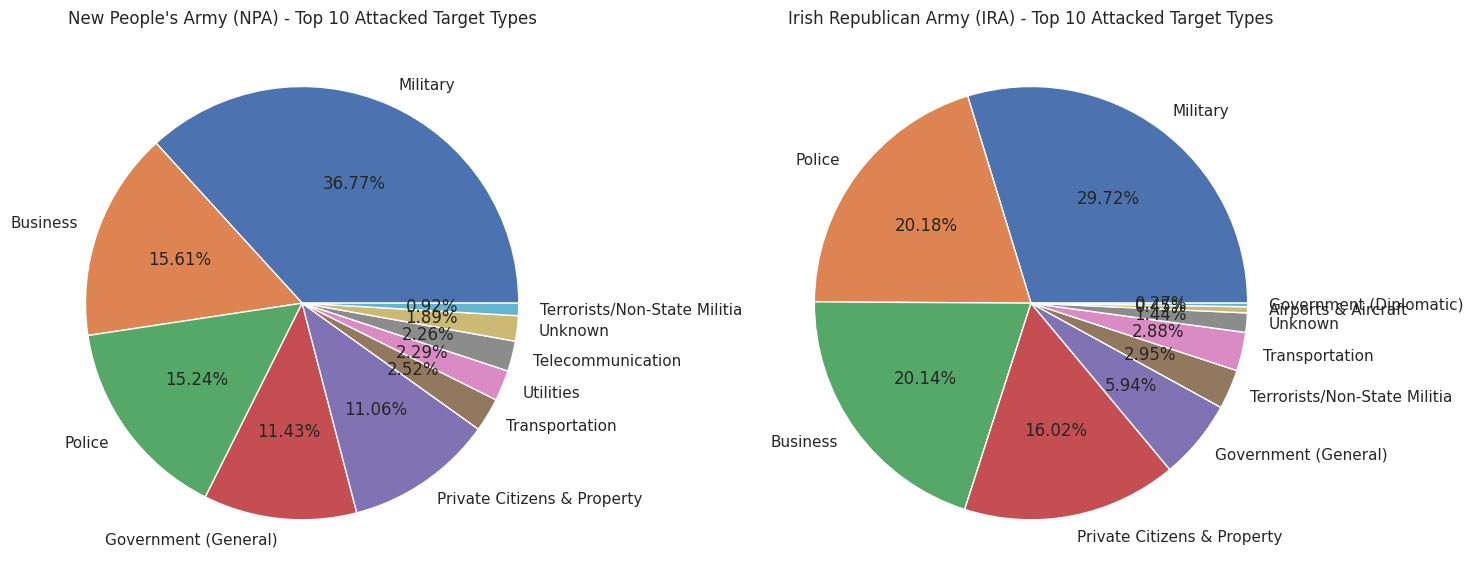

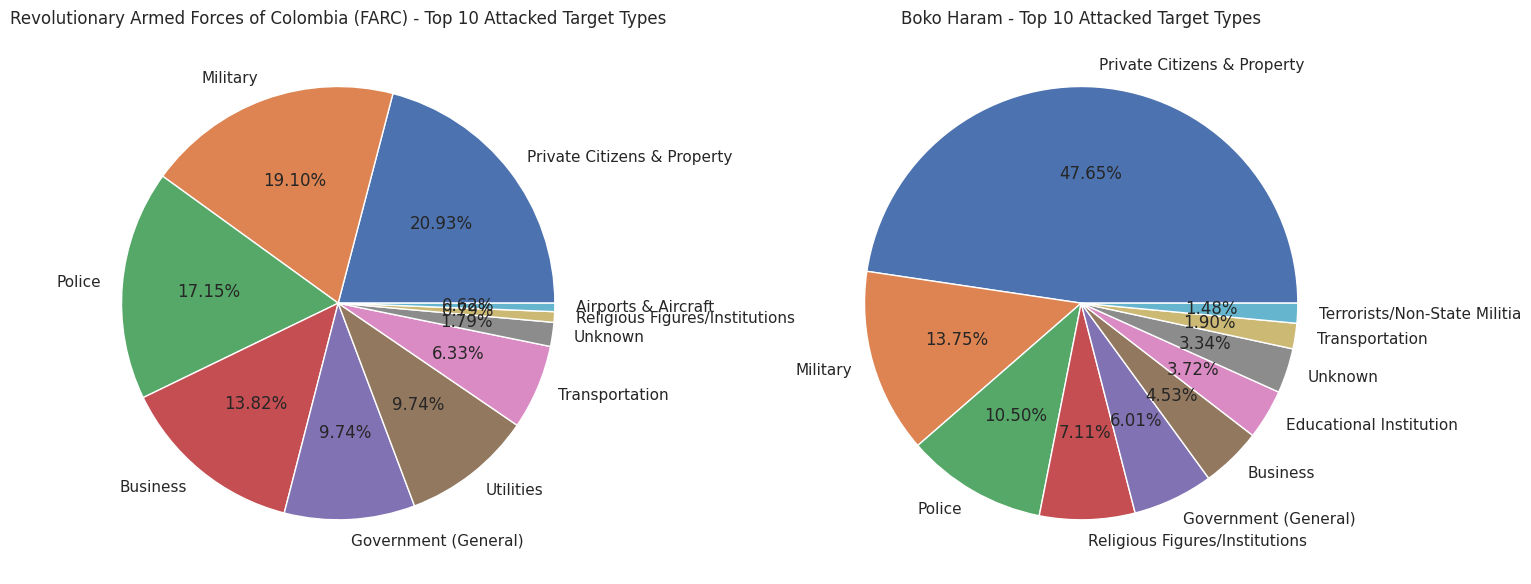

In [170]:
top_terrorist_groups = groups['gname'].value_counts().nlargest(10).index

import math

# Number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = math.ceil(len(top_terrorist_groups) / plots_per_row)

# Plotting in rows
for row in range(num_rows):
    plt.figure(figsize=(15, 6))

    # Iterate over each plot in the row
    for col in range(plots_per_row):
        # Calculate the index of the current group in the overall list
        index = row * plots_per_row + col

        # Check if the index is within the range of top_terrorist_groups
        if index < len(top_terrorist_groups):
            group_name = top_terrorist_groups[index]

            # Extract the relevant group
            group_data = groups[groups['gname'] == group_name]

            # Calculate and sort target types
            sort_target_types = group_data['targtype1_txt'].value_counts().sort_values(ascending=False)

            # Create subplots
            plt.subplot(1, plots_per_row, col + 1)

            # Plot the pie chart
            plt.pie(sort_target_types[:10].values, labels=sort_target_types[:10].index, autopct='%.2f%%')
            plt.title(f"{group_name} - Top 10 Attacked Target Types")

    plt.tight_layout()
    plt.show()




As Year passing by these 4 terrorist groups becoming stronger and resulting to major events around the global

1.**ISIL** *( Islamic State of Iraq and the levant )*

--ISIL was the deadliest group in 2016 with a more than 100 percent increase in deaths from its previous peak in 2015.\
--This group is active in Iraq however after attacks in 2016 it has lower its activites and on further finding s we find out, ISIL is now near complete military defeat in Iraq and Syria.\
--Thus we can see less events from this group for a year two as it was near complete defeat.\
--ISIL main method of attack is Explosion and Bombing.\
--Their most attacked target are *'Private citizen and Property  , Military'* \

2.**Taliban**

--As plotted above the activities of Taliban over years ,their terrorist attack trend keep growing and if it this keeps on they will lead to some major events in coming years as we can see in present day, Taliban overthrowned the Afghanistan goverment and now it is in power in the country.\
--Taliban consistently used bombings and armed assaults as its main modes of attack.\
--Seems their favourite target is *'Police  and   Military'*

3.**Al-Shabaab**

--A Salafist militant group active in East Africa.\

--This group recorded a more than 4 times casuslties in 2017 compared to what it wasa in 2016.\
--This exponential growth suggest only that this group is strengthening i region of somalia and kenya.\
--Al-Shabaab has consistently utilised bombings and armed assaults as its main modes of attack.\
--Seems their favourite target is '*Military*'

4.**Boko Haram**

--Boko Haram is a jihadist extremist group based in northeastern Nigeria.

--This group engaging in terrorism activities from 2010 therfore it
  can be called as emerging terrorist group which did a major attack in 2014 as seen graph resulting in more than 300 casualties.

--There major source of attack is Armed Assault, and seems to target *'Private citizen and Property'* more often


--Iraq experienced a 40 per cent increase in deaths in 2016 in reflecting the increased intensity of ISIL activity following attacks by the Iraqi Armed Forces.

--Middle East & North Africa , South East Asia are the two regions that seen a major surge of terrorism activities from 2005 till 2015 , while Central and South America were least affected.

--Globally, attacks against private properties increased by nearly 16 percent from 2015 to 2016. The primary targets of terrorists are private citizens and property.

## **Conclusion**

The analysis revealed the most active terrorist group and shed light on the weaponry associated with their activities. Understanding the preferred weapons of a group is crucial for security and counter-terrorism efforts.
Result:

The identified most active terrorist group was **Taliban**, with **7478** recorded incidents.
The types of weapons frequently used by this group include **bombing and explosion** , indicating a diverse range of weaponry in their activities.

**Insights and Implications:**

This analysis contributes to understanding the landscape of terrorism by pinpointing the most active groups and their weapon preferences.
The insights gained can inform strategic decisions in counter-terrorism efforts, resource allocation, and intelligence gathering.

**Recommendations:**

Based on the identified active group and their weapon usage patterns, law enforcement and security agencies can tailor their strategies to address specific threats effectively.
Ongoing monitoring and analysis of these patterns are crucial for staying ahead of evolving tactics and ensuring the safety and security of affected regions.